In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import jax
import ott
import diffrax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from entot.models.model import OTFlowMatching
from entot.nets.nets import MLP_vector_field, MLP_bridge, MLP_marginal
import sklearn.preprocessing as pp
import scanpy as sc
from ott.solvers.linear import sinkhorn, acceleration
from entot.data.data import MixtureNormalSampler
from entot.plotting.plots import plot_1D_unbalanced

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/equinox/_ad.py:753: UserWarning: As of Equinox 0.10.7, `equinox.filter_custom_vjp.defvjp` is deprecated in favour of `.def_fwd` and `.def_bwd`. This new API supports symbolic zeros, which allow for more efficient autodifferentiation rules. In particular:
- the fwd and bwd functions take an extra `perturbed` argument, which     indicates which primals actually need a gradient. You can use this     to skip computing the gradient for any unperturbed value. (You can     also safely just ignore this if you wish.)
- `None` was previously passed to indicate a symbolic zero gradient for     all objects that weren't inexact arrays, but all inexact arrays     always had an array-valued gradient. Now, `None` may also be passed     to indicate that an inexact array has a symbolic zero gradient.
  warnings.warn(
2023-09-15 15:13:15.740030: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not 

In [3]:
source = MixtureNormalSampler(jax.random.PRNGKey(0), [0], 1,  0.5, batch_size=1024)
target = MixtureNormalSampler(jax.random.PRNGKey(1), [-1.0,1.0, 5.0], 1,  0.1, batch_size=1024)

2023-09-15 15:13:28.073386: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.2.128). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [4]:
epsilon = 5e-3
tau_a = 0.98
tau_b = 0.98

In [5]:
neural_net = MLP_vector_field(1, latent_embed_dim = 256, num_layers=5, n_frequencies=128)
bridge_net = MLP_bridge(1, 1)

mlp_eta = MLP_marginal(128)
mlp_xi = MLP_marginal(128)

ot_solver = ott.solvers.linear.sinkhorn.Sinkhorn()

otfm = OTFlowMatching(neural_net, bridge_net=bridge_net, ot_solver=ot_solver, epsilon=epsilon, mlp_eta=mlp_eta, mlp_xi=mlp_xi, tau_a=tau_a, tau_b=tau_b, input_dim=1, output_dim=1, iterations=5_000, k_noise_per_x=1)

In [6]:
otfm(source, target)

  0%|          | 0/5000 [00:00<?, ?it/s]

max a is 0.001887014601379633
max b is 0.002537056803703308


  0%|          | 1/5000 [00:17<24:54:29, 17.94s/it]

max a is 0.0018671464640647173
max b is 0.002473729196935892


  0%|          | 2/5000 [00:18<10:30:33,  7.57s/it]

max a is 0.0019498360343277454
max b is 0.0028289221227169037


  0%|          | 3/5000 [00:18<5:54:38,  4.26s/it] 

max a is 0.0019324352033436298
max b is 0.002690582536160946


  0%|          | 4/5000 [00:18<3:44:57,  2.70s/it]

max a is 0.0019752441439777613
max b is 0.002868733834475279


  0%|          | 5/5000 [00:19<2:33:10,  1.84s/it]

max a is 0.0019507555989548564
max b is 0.0033230376429855824


  0%|          | 6/5000 [00:19<1:50:11,  1.32s/it]

max a is 0.0018221476348116994
max b is 0.0029338132590055466


  0%|          | 7/5000 [00:19<1:22:45,  1.01it/s]

max a is 0.0019305810565128922
max b is 0.0024561807513237


  0%|          | 8/5000 [00:20<1:05:01,  1.28it/s]

max a is 0.0018342805560678244
max b is 0.0037444252520799637


  0%|          | 9/5000 [00:20<53:04,  1.57it/s]  

max a is 0.0018587445374578238
max b is 0.0028565514367073774


  0%|          | 10/5000 [00:20<44:38,  1.86it/s]

max a is 0.0018595325527712703
max b is 0.0036294027231633663


  0%|          | 11/5000 [00:21<38:55,  2.14it/s]

max a is 0.002021642867475748
max b is 0.0021822841372340918


  0%|          | 12/5000 [00:21<34:56,  2.38it/s]

max a is 0.0018961343448609114
max b is 0.002527943579480052


  0%|          | 13/5000 [00:21<32:07,  2.59it/s]

max a is 0.0020152642391622066
max b is 0.002225866075605154


  0%|          | 14/5000 [00:22<30:24,  2.73it/s]

max a is 0.00214958842843771
max b is 0.0025640176609158516


  0%|          | 15/5000 [00:22<29:15,  2.84it/s]

max a is 0.0019172362517565489
max b is 0.0028665997087955475


  0%|          | 16/5000 [00:22<28:22,  2.93it/s]

max a is 0.0019223970593884587
max b is 0.002828439697623253


  0%|          | 17/5000 [00:22<27:46,  2.99it/s]

max a is 0.001958330161869526
max b is 0.005382734350860119


  0%|          | 18/5000 [00:23<27:14,  3.05it/s]

max a is 0.0019234722713008523
max b is 0.002085199113935232


  0%|          | 19/5000 [00:23<26:52,  3.09it/s]

max a is 0.001830389373935759
max b is 0.0031505527440458536


  0%|          | 20/5000 [00:23<26:32,  3.13it/s]

max a is 0.0018799472600221634
max b is 0.00268420297652483


  0%|          | 21/5000 [00:24<26:12,  3.17it/s]

max a is 0.001996340462937951
max b is 0.0021580762695521116


  0%|          | 22/5000 [00:24<25:59,  3.19it/s]

max a is 0.0018686859402805567
max b is 0.0025054195430129766


  0%|          | 23/5000 [00:24<25:55,  3.20it/s]

max a is 0.00198202021420002
max b is 0.0020952103659510612


  0%|          | 24/5000 [00:25<25:43,  3.22it/s]

max a is 0.0019037032034248114
max b is 0.0021904343739151955


  0%|          | 25/5000 [00:25<25:48,  3.21it/s]

max a is 0.0019842989277094603
max b is 0.002806026954203844


  1%|          | 26/5000 [00:25<25:59,  3.19it/s]

max a is 0.0021115741692483425
max b is 0.0034693428315222263


  1%|          | 27/5000 [00:26<26:10,  3.17it/s]

max a is 0.0018896457040682435
max b is 0.002624988555908203


  1%|          | 28/5000 [00:26<26:17,  3.15it/s]

max a is 0.0019288862822577357
max b is 0.002972233574837446


  1%|          | 29/5000 [00:26<26:12,  3.16it/s]

max a is 0.0018706563860177994
max b is 0.003051011823117733


  1%|          | 30/5000 [00:27<26:10,  3.16it/s]

max a is 0.0019190512830391526
max b is 0.0023796167224645615


  1%|          | 31/5000 [00:27<25:59,  3.19it/s]

max a is 0.0018011762294918299
max b is 0.002309204777702689


  1%|          | 32/5000 [00:27<25:55,  3.19it/s]

max a is 0.0018993213307112455
max b is 0.0027996189892292023


  1%|          | 33/5000 [00:27<25:43,  3.22it/s]

max a is 0.001818058779463172
max b is 0.0022317746188491583


  1%|          | 34/5000 [00:28<25:45,  3.21it/s]

max a is 0.0018711199518293142
max b is 0.0024971000384539366


  1%|          | 35/5000 [00:28<25:46,  3.21it/s]

max a is 0.0018482079030945897
max b is 0.002548825927078724


  1%|          | 36/5000 [00:28<25:31,  3.24it/s]

max a is 0.0018303361721336842
max b is 0.0027431072667241096


  1%|          | 37/5000 [00:29<25:20,  3.26it/s]

max a is 0.001937450491823256
max b is 0.0029109413735568523


  1%|          | 38/5000 [00:29<25:35,  3.23it/s]

max a is 0.0018217847682535648
max b is 0.0025087930262088776


  1%|          | 39/5000 [00:29<25:49,  3.20it/s]

max a is 0.001894284039735794
max b is 0.0027670133858919144


  1%|          | 40/5000 [00:30<26:03,  3.17it/s]

max a is 0.002021020743995905
max b is 0.002762345364317298


  1%|          | 41/5000 [00:30<26:15,  3.15it/s]

max a is 0.0019284659065306187
max b is 0.0025529470294713974


  1%|          | 42/5000 [00:30<26:03,  3.17it/s]

max a is 0.001860990421846509
max b is 0.0023469761945307255


  1%|          | 43/5000 [00:31<26:11,  3.15it/s]

max a is 0.0019137494964525104
max b is 0.0038794968277215958


  1%|          | 44/5000 [00:31<26:01,  3.17it/s]

max a is 0.00194263004232198
max b is 0.002806476317346096


  1%|          | 45/5000 [00:31<29:51,  2.77it/s]

max a is 0.001927513862028718
max b is 0.002374043222516775


  1%|          | 46/5000 [00:32<28:38,  2.88it/s]

max a is 0.0018753105541691184
max b is 0.0024011656641960144


  1%|          | 47/5000 [00:32<27:50,  2.97it/s]

max a is 0.0018484937027096748
max b is 0.002844980452209711


  1%|          | 48/5000 [00:32<27:17,  3.02it/s]

max a is 0.0018546476494520903
max b is 0.0027772383764386177


  1%|          | 49/5000 [00:33<26:56,  3.06it/s]

max a is 0.002022035885602236
max b is 0.0032094288617372513


  1%|          | 50/5000 [00:33<26:46,  3.08it/s]

max a is 0.0019127981504425406
max b is 0.0026136301457881927


  1%|          | 51/5000 [00:33<26:34,  3.10it/s]

max a is 0.0018274319591000676
max b is 0.002229900099337101


  1%|          | 52/5000 [00:34<26:13,  3.14it/s]

max a is 0.0018845609156414866
max b is 0.002379756886512041


  1%|          | 53/5000 [00:34<26:06,  3.16it/s]

max a is 0.0018817196832969785
max b is 0.0025608744472265244


  1%|          | 54/5000 [00:34<26:04,  3.16it/s]

max a is 0.001947071636095643
max b is 0.002548180753365159


  1%|          | 55/5000 [00:35<26:08,  3.15it/s]

max a is 0.001989601645618677
max b is 0.003250494599342346


  1%|          | 56/5000 [00:35<26:15,  3.14it/s]

max a is 0.0019065765663981438
max b is 0.0025205854326486588


  1%|          | 57/5000 [00:35<25:52,  3.18it/s]

max a is 0.0019475551089271903
max b is 0.0028832461684942245


  1%|          | 58/5000 [00:36<25:44,  3.20it/s]

max a is 0.001906547462567687
max b is 0.0022393667604774237


  1%|          | 59/5000 [00:36<25:40,  3.21it/s]

max a is 0.0019927211105823517
max b is 0.0024342071264982224


  1%|          | 60/5000 [00:36<25:51,  3.18it/s]

max a is 0.001921511022374034
max b is 0.0022976654581725597


  1%|          | 61/5000 [00:36<26:01,  3.16it/s]

max a is 0.0019221929833292961
max b is 0.002487792167812586


  1%|          | 62/5000 [00:37<26:08,  3.15it/s]

max a is 0.0018862938741222024
max b is 0.0025545614771544933


  1%|▏         | 63/5000 [00:37<26:00,  3.16it/s]

max a is 0.0019758581183850765
max b is 0.0022232411429286003


  1%|▏         | 64/5000 [00:37<25:49,  3.19it/s]

max a is 0.0018518231809139252
max b is 0.0023536598309874535


  1%|▏         | 65/5000 [00:38<25:42,  3.20it/s]

max a is 0.0018502770690247416
max b is 0.0024671717546880245


  1%|▏         | 66/5000 [00:38<25:26,  3.23it/s]

max a is 0.0017836380284279585
max b is 0.0028369631618261337


  1%|▏         | 67/5000 [00:38<25:25,  3.23it/s]

max a is 0.0019336547702550888
max b is 0.002832778263837099


  1%|▏         | 68/5000 [00:39<25:29,  3.23it/s]

max a is 0.0020058108493685722
max b is 0.0028810547664761543


  1%|▏         | 69/5000 [00:39<25:54,  3.17it/s]

max a is 0.0019649832975119352
max b is 0.003280247561633587


  1%|▏         | 70/5000 [00:39<25:49,  3.18it/s]

max a is 0.0019956722389906645
max b is 0.002271592617034912


  1%|▏         | 71/5000 [00:40<25:50,  3.18it/s]

max a is 0.001918757800012827
max b is 0.002218065783381462


  1%|▏         | 72/5000 [00:40<25:49,  3.18it/s]

max a is 0.0018984272610396147
max b is 0.002373041585087776


  1%|▏         | 73/5000 [00:40<25:50,  3.18it/s]

max a is 0.0018662572838366032
max b is 0.0022260891273617744


  1%|▏         | 74/5000 [00:41<25:40,  3.20it/s]

max a is 0.0019016452133655548
max b is 0.0028530475683510303


  2%|▏         | 75/5000 [00:41<25:23,  3.23it/s]

max a is 0.0019919327460229397
max b is 0.002254955004900694


  2%|▏         | 76/5000 [00:41<25:29,  3.22it/s]

max a is 0.0019604440312832594
max b is 0.003005265723913908


  2%|▏         | 77/5000 [00:41<25:24,  3.23it/s]

max a is 0.001947690499946475
max b is 0.0026511678006500006


  2%|▏         | 78/5000 [00:42<25:21,  3.24it/s]

max a is 0.0018699981737881899
max b is 0.0030639958567917347


  2%|▏         | 79/5000 [00:42<25:24,  3.23it/s]

max a is 0.0019092492293566465
max b is 0.002796346787363291


  2%|▏         | 80/5000 [00:42<25:35,  3.20it/s]

max a is 0.0018638180335983634
max b is 0.0027226305101066828


  2%|▏         | 81/5000 [00:43<25:26,  3.22it/s]

max a is 0.001909212558530271
max b is 0.004443006590008736


  2%|▏         | 82/5000 [00:43<25:44,  3.18it/s]

max a is 0.001921426854096353
max b is 0.0029821195639669895


  2%|▏         | 83/5000 [00:43<25:38,  3.20it/s]

max a is 0.0018328932346776128
max b is 0.0031628641299903393


  2%|▏         | 84/5000 [00:44<25:48,  3.18it/s]

max a is 0.0018301523523405194
max b is 0.0043958630412817


  2%|▏         | 85/5000 [00:44<25:49,  3.17it/s]

max a is 0.001965082250535488
max b is 0.0021778158843517303


  2%|▏         | 86/5000 [00:44<25:48,  3.17it/s]

max a is 0.001958876382559538
max b is 0.0032148619648069143


  2%|▏         | 87/5000 [00:45<25:58,  3.15it/s]

max a is 0.001841631019487977
max b is 0.002278098138049245


  2%|▏         | 88/5000 [00:45<25:48,  3.17it/s]

max a is 0.0018876389367505908
max b is 0.0023817764595150948


  2%|▏         | 89/5000 [00:45<25:37,  3.19it/s]

max a is 0.0019306947942823172
max b is 0.0021792997140437365


  2%|▏         | 90/5000 [00:46<25:18,  3.23it/s]

max a is 0.001873133471235633
max b is 0.003411212470382452


  2%|▏         | 91/5000 [00:46<25:07,  3.26it/s]

max a is 0.0019253571517765522
max b is 0.002835754072293639


  2%|▏         | 92/5000 [00:46<25:01,  3.27it/s]

max a is 0.0019054084550589323
max b is 0.002529502846300602


  2%|▏         | 93/5000 [00:46<25:05,  3.26it/s]

max a is 0.0019105002284049988
max b is 0.0029851868748664856


  2%|▏         | 94/5000 [00:47<25:15,  3.24it/s]

max a is 0.0018560877069830894
max b is 0.0022776674013584852


  2%|▏         | 95/5000 [00:47<25:21,  3.22it/s]

max a is 0.001995057100430131
max b is 0.002289555035531521


  2%|▏         | 96/5000 [00:47<25:31,  3.20it/s]

max a is 0.0018974455306306481
max b is 0.002662144834175706


  2%|▏         | 97/5000 [00:48<25:26,  3.21it/s]

max a is 0.0018244922393932939
max b is 0.0023200921714305878


  2%|▏         | 98/5000 [00:48<25:17,  3.23it/s]

max a is 0.0018937804270535707
max b is 0.003571833483874798


  2%|▏         | 99/5000 [00:48<25:27,  3.21it/s]

max a is 0.0018711196025833488
max b is 0.002726431470364332


  2%|▏         | 100/5000 [00:49<25:13,  3.24it/s]

max a is 0.001880762865766883
max b is 0.0024776654317975044


  2%|▏         | 101/5000 [00:49<25:19,  3.22it/s]

max a is 0.0020150672644376755
max b is 0.0027724350802600384


  2%|▏         | 102/5000 [00:49<25:14,  3.23it/s]

max a is 0.0019150967709720135
max b is 0.0020912443287670612


  2%|▏         | 103/5000 [00:50<29:08,  2.80it/s]

max a is 0.0018427044851705432
max b is 0.0031113391742110252


  2%|▏         | 104/5000 [00:50<28:02,  2.91it/s]

max a is 0.0020542351994663477
max b is 0.0027004946023225784


  2%|▏         | 105/5000 [00:50<27:12,  3.00it/s]

max a is 0.00190960883628577
max b is 0.0030246416572481394


  2%|▏         | 106/5000 [00:51<26:40,  3.06it/s]

max a is 0.0021393592469394207
max b is 0.002587375231087208


  2%|▏         | 107/5000 [00:51<26:13,  3.11it/s]

max a is 0.0017957001691684127
max b is 0.0028109778650105


  2%|▏         | 108/5000 [00:51<25:57,  3.14it/s]

max a is 0.0019086131360381842
max b is 0.0033569536171853542


  2%|▏         | 109/5000 [00:52<25:46,  3.16it/s]

max a is 0.002014735247939825
max b is 0.0035047598648816347


  2%|▏         | 110/5000 [00:52<25:38,  3.18it/s]

max a is 0.0019462751224637032
max b is 0.0029917138163000345


  2%|▏         | 111/5000 [00:52<25:33,  3.19it/s]

max a is 0.0017988996114581823
max b is 0.002158805727958679


  2%|▏         | 112/5000 [00:52<25:29,  3.20it/s]

max a is 0.0019490541890263557
max b is 0.002785733202472329


  2%|▏         | 113/5000 [00:53<25:24,  3.20it/s]

max a is 0.0018703804817050695
max b is 0.0022338037379086018


  2%|▏         | 114/5000 [00:53<25:10,  3.23it/s]

max a is 0.0017647638451308012
max b is 0.0033958246931433678


  2%|▏         | 115/5000 [00:53<25:15,  3.22it/s]

max a is 0.0019524674862623215
max b is 0.0020632296800613403


  2%|▏         | 116/5000 [00:54<25:20,  3.21it/s]

max a is 0.0018760389648377895
max b is 0.0026652440428733826


  2%|▏         | 117/5000 [00:54<25:15,  3.22it/s]

max a is 0.0018506415653973818
max b is 0.002673833165317774


  2%|▏         | 118/5000 [00:54<25:23,  3.20it/s]

max a is 0.0019143077079206705
max b is 0.003149358555674553


  2%|▏         | 119/5000 [00:55<25:28,  3.19it/s]

max a is 0.0018787151202559471
max b is 0.002972856629639864


  2%|▏         | 120/5000 [00:55<25:38,  3.17it/s]

max a is 0.0018261640798300505
max b is 0.0027367561124265194


  2%|▏         | 121/5000 [00:55<25:56,  3.13it/s]

max a is 0.001972227357327938
max b is 0.0036589738447219133


  2%|▏         | 122/5000 [00:56<25:47,  3.15it/s]

max a is 0.0017951540648937225
max b is 0.003332790918648243


  2%|▏         | 123/5000 [00:56<25:44,  3.16it/s]

max a is 0.0018341753166168928
max b is 0.0024175590369850397


  2%|▏         | 124/5000 [00:56<25:40,  3.17it/s]

max a is 0.0019397129071876407
max b is 0.003075383137911558


  2%|▎         | 125/5000 [00:57<25:22,  3.20it/s]

max a is 0.002026685979217291
max b is 0.0025359559804201126


  3%|▎         | 126/5000 [00:57<25:22,  3.20it/s]

max a is 0.0018522503087297082
max b is 0.0030227394308894873


  3%|▎         | 127/5000 [00:57<25:32,  3.18it/s]

max a is 0.0018319938099011779
max b is 0.002647821791470051


  3%|▎         | 128/5000 [00:57<25:16,  3.21it/s]

max a is 0.00202265870757401
max b is 0.002588814590126276


  3%|▎         | 129/5000 [00:58<25:24,  3.20it/s]

max a is 0.0020463643595576286
max b is 0.0029311019461601973


  3%|▎         | 130/5000 [00:58<25:24,  3.19it/s]

max a is 0.0019117237534373999
max b is 0.0027250475250184536


  3%|▎         | 131/5000 [00:58<25:31,  3.18it/s]

max a is 0.0018626672681421041
max b is 0.002718260046094656


  3%|▎         | 132/5000 [00:59<25:31,  3.18it/s]

max a is 0.0019442986231297255
max b is 0.0030884211882948875


  3%|▎         | 133/5000 [00:59<25:28,  3.18it/s]

max a is 0.0018968327203765512
max b is 0.0024182237684726715


  3%|▎         | 134/5000 [00:59<25:26,  3.19it/s]

max a is 0.0019621876999735832
max b is 0.0029615480452775955


  3%|▎         | 135/5000 [01:00<25:26,  3.19it/s]

max a is 0.0018874229863286018
max b is 0.0026100545655936003


  3%|▎         | 136/5000 [01:00<25:14,  3.21it/s]

max a is 0.001875291927717626
max b is 0.003014663700014353


  3%|▎         | 137/5000 [01:00<25:28,  3.18it/s]

max a is 0.0018543618498370051
max b is 0.002526507480069995


  3%|▎         | 138/5000 [01:01<25:48,  3.14it/s]

max a is 0.0018234412418678403
max b is 0.003563106060028076


  3%|▎         | 139/5000 [01:01<25:41,  3.15it/s]

max a is 0.001748118782415986
max b is 0.0028587328270077705


  3%|▎         | 140/5000 [01:01<25:26,  3.18it/s]

max a is 0.0018921372247859836
max b is 0.003961545415222645


  3%|▎         | 141/5000 [01:02<25:29,  3.18it/s]

max a is 0.0018509256187826395
max b is 0.0031617863569408655


  3%|▎         | 142/5000 [01:02<25:28,  3.18it/s]

max a is 0.0019818164873868227
max b is 0.002490516984835267


  3%|▎         | 143/5000 [01:02<25:10,  3.22it/s]

max a is 0.0019040880724787712
max b is 0.002761626150459051


  3%|▎         | 144/5000 [01:03<24:56,  3.25it/s]

max a is 0.0018820790573954582
max b is 0.0029496417846530676


  3%|▎         | 145/5000 [01:03<24:54,  3.25it/s]

max a is 0.0019827079959213734
max b is 0.002355705015361309


  3%|▎         | 146/5000 [01:03<24:57,  3.24it/s]

max a is 0.001966264797374606
max b is 0.0027844442520290613


  3%|▎         | 147/5000 [01:03<25:06,  3.22it/s]

max a is 0.0018571611726656556
max b is 0.0028792410157620907


  3%|▎         | 148/5000 [01:04<25:10,  3.21it/s]

max a is 0.0017928453162312508
max b is 0.0035409945994615555


  3%|▎         | 149/5000 [01:04<25:13,  3.21it/s]

max a is 0.001862233504652977
max b is 0.0029165754094719887


  3%|▎         | 150/5000 [01:04<25:09,  3.21it/s]

max a is 0.001819138997234404
max b is 0.00244492432102561


  3%|▎         | 151/5000 [01:05<25:19,  3.19it/s]

max a is 0.0018326221033930779
max b is 0.0027894978411495686


  3%|▎         | 152/5000 [01:05<25:34,  3.16it/s]

max a is 0.0018518827855587006
max b is 0.0024143466725945473


  3%|▎         | 153/5000 [01:05<25:44,  3.14it/s]

max a is 0.0019402038305997849
max b is 0.0028272082563489676


  3%|▎         | 154/5000 [01:06<25:41,  3.14it/s]

max a is 0.001950326026417315
max b is 0.0024402658455073833


  3%|▎         | 155/5000 [01:06<25:33,  3.16it/s]

max a is 0.0018350585596635938
max b is 0.002747960854321718


  3%|▎         | 156/5000 [01:06<25:36,  3.15it/s]

max a is 0.0019430392421782017
max b is 0.002591485856100917


  3%|▎         | 157/5000 [01:07<25:45,  3.13it/s]

max a is 0.0019356366246938705
max b is 0.0024804514832794666


  3%|▎         | 158/5000 [01:07<25:51,  3.12it/s]

max a is 0.001966088777408004
max b is 0.0025885156355798244


  3%|▎         | 159/5000 [01:07<30:28,  2.65it/s]

max a is 0.002051442861557007
max b is 0.002196688437834382


  3%|▎         | 160/5000 [01:08<28:54,  2.79it/s]

max a is 0.0019755137618631124
max b is 0.002305211266502738


  3%|▎         | 161/5000 [01:08<27:40,  2.91it/s]

max a is 0.0019365298794582486
max b is 0.002405144739896059


  3%|▎         | 162/5000 [01:08<27:06,  2.98it/s]

max a is 0.001901692128740251
max b is 0.0028766354080289602


  3%|▎         | 163/5000 [01:09<26:35,  3.03it/s]

max a is 0.0018919311696663499
max b is 0.002514735795557499


  3%|▎         | 164/5000 [01:09<26:16,  3.07it/s]

max a is 0.0018814705545082688
max b is 0.002973871538415551


  3%|▎         | 165/5000 [01:09<26:08,  3.08it/s]

max a is 0.001915500732138753
max b is 0.00314596900716424


  3%|▎         | 166/5000 [01:10<25:53,  3.11it/s]

max a is 0.001906922785565257
max b is 0.0023272433318197727


  3%|▎         | 167/5000 [01:10<25:43,  3.13it/s]

max a is 0.001922489027492702
max b is 0.0027846440207213163


  3%|▎         | 168/5000 [01:10<25:37,  3.14it/s]

max a is 0.0018602353520691395
max b is 0.0021428000181913376


  3%|▎         | 169/5000 [01:11<25:41,  3.13it/s]

max a is 0.0019675646908581257
max b is 0.003723669797182083


  3%|▎         | 170/5000 [01:11<25:47,  3.12it/s]

max a is 0.001828132662922144
max b is 0.0024119403678923845


  3%|▎         | 171/5000 [01:11<25:50,  3.11it/s]

max a is 0.0018371555488556623
max b is 0.0027053863741457462


  3%|▎         | 172/5000 [01:12<25:51,  3.11it/s]

max a is 0.0021387168671935797
max b is 0.0031570205464959145


  3%|▎         | 173/5000 [01:12<25:50,  3.11it/s]

max a is 0.0018176662269979715
max b is 0.0024313584435731173


  3%|▎         | 174/5000 [01:12<25:51,  3.11it/s]

max a is 0.0019178256625309587
max b is 0.0030366843566298485


  4%|▎         | 175/5000 [01:13<25:53,  3.11it/s]

max a is 0.0018924716860055923
max b is 0.00324949249625206


  4%|▎         | 176/5000 [01:13<25:44,  3.12it/s]

max a is 0.001872908789664507
max b is 0.0026366356760263443


  4%|▎         | 177/5000 [01:13<25:31,  3.15it/s]

max a is 0.0018565640784800053
max b is 0.0021530603989958763


  4%|▎         | 178/5000 [01:13<25:24,  3.16it/s]

max a is 0.001946906791999936
max b is 0.0024973959662020206


  4%|▎         | 179/5000 [01:14<25:18,  3.18it/s]

max a is 0.0019392581889405847
max b is 0.0024505499750375748


  4%|▎         | 180/5000 [01:14<25:11,  3.19it/s]

max a is 0.0019218155648559332
max b is 0.002361242426559329


  4%|▎         | 181/5000 [01:14<24:51,  3.23it/s]

max a is 0.0019073768053203821
max b is 0.0025120247155427933


  4%|▎         | 182/5000 [01:15<25:00,  3.21it/s]

max a is 0.0019022823544219136
max b is 0.002596944337710738


  4%|▎         | 183/5000 [01:15<24:57,  3.22it/s]

max a is 0.001993885962292552
max b is 0.003500807099044323


  4%|▎         | 184/5000 [01:15<25:01,  3.21it/s]

max a is 0.0020054399501532316
max b is 0.002641195897012949


  4%|▎         | 185/5000 [01:16<25:11,  3.18it/s]

max a is 0.0018613265128806233
max b is 0.0030445889569818974


  4%|▎         | 186/5000 [01:16<25:14,  3.18it/s]

max a is 0.001972563099116087
max b is 0.0024983184412121773


  4%|▎         | 187/5000 [01:16<25:24,  3.16it/s]

max a is 0.0019594929181039333
max b is 0.00198812666349113


  4%|▍         | 188/5000 [01:17<25:32,  3.14it/s]

max a is 0.001920910319313407
max b is 0.0022193463519215584


  4%|▍         | 189/5000 [01:17<25:28,  3.15it/s]

max a is 0.0018969022203236818
max b is 0.0023211410734802485


  4%|▍         | 190/5000 [01:17<25:26,  3.15it/s]

max a is 0.0018846902530640364
max b is 0.003145392518490553


  4%|▍         | 191/5000 [01:18<25:21,  3.16it/s]

max a is 0.002098468132317066
max b is 0.0024124844931066036


  4%|▍         | 192/5000 [01:18<25:17,  3.17it/s]

max a is 0.0018364769639447331
max b is 0.0023590251803398132


  4%|▍         | 193/5000 [01:18<25:13,  3.18it/s]

max a is 0.0018638393376022577
max b is 0.0026079253293573856


  4%|▍         | 194/5000 [01:19<25:10,  3.18it/s]

max a is 0.0019034405704587698
max b is 0.0021779690869152546


  4%|▍         | 195/5000 [01:19<25:16,  3.17it/s]

max a is 0.0020330906845629215
max b is 0.0029119974933564663


  4%|▍         | 196/5000 [01:19<25:06,  3.19it/s]

max a is 0.0018812681082636118
max b is 0.0029452620074152946


  4%|▍         | 197/5000 [01:19<25:07,  3.19it/s]

max a is 0.002017964143306017
max b is 0.0032564420253038406


  4%|▍         | 198/5000 [01:20<25:16,  3.17it/s]

max a is 0.0019165616249665618
max b is 0.0024186877999454737


  4%|▍         | 199/5000 [01:20<25:15,  3.17it/s]

max a is 0.0019024282228201628
max b is 0.0026314035058021545


  4%|▍         | 200/5000 [01:20<25:22,  3.15it/s]

max a is 0.0018439069390296936
max b is 0.0037494031712412834


  4%|▍         | 201/5000 [01:21<25:20,  3.16it/s]

max a is 0.0018217605538666248
max b is 0.0025900208856910467


  4%|▍         | 202/5000 [01:21<25:15,  3.17it/s]

max a is 0.0018381967674940825
max b is 0.003507737535983324


  4%|▍         | 203/5000 [01:21<25:09,  3.18it/s]

max a is 0.0018905694596469402
max b is 0.0022227629087865353


  4%|▍         | 204/5000 [01:22<25:05,  3.19it/s]

max a is 0.001897164504043758
max b is 0.0021599677857011557


  4%|▍         | 205/5000 [01:22<25:01,  3.19it/s]

max a is 0.0018658339977264404
max b is 0.0030880686827003956


  4%|▍         | 206/5000 [01:22<25:00,  3.20it/s]

max a is 0.0018412749050185084
max b is 0.002379941986873746


  4%|▍         | 207/5000 [01:23<25:03,  3.19it/s]

max a is 0.0018124503549188375
max b is 0.002523298840969801


  4%|▍         | 208/5000 [01:23<24:54,  3.21it/s]

max a is 0.0019338249694555998
max b is 0.00350290909409523


  4%|▍         | 209/5000 [01:23<24:56,  3.20it/s]

max a is 0.0020030969753861427
max b is 0.002276358427479863


  4%|▍         | 210/5000 [01:24<25:01,  3.19it/s]

max a is 0.0018803816055878997
max b is 0.0026008146815001965


  4%|▍         | 211/5000 [01:24<25:11,  3.17it/s]

max a is 0.001960922498255968
max b is 0.0021204911172389984


  4%|▍         | 212/5000 [01:24<25:09,  3.17it/s]

max a is 0.001976689323782921
max b is 0.0025068779941648245


  4%|▍         | 213/5000 [01:24<24:56,  3.20it/s]

max a is 0.0019554258324205875
max b is 0.002035275800153613


  4%|▍         | 214/5000 [01:25<25:04,  3.18it/s]

max a is 0.0019258208340033889
max b is 0.002866355236619711


  4%|▍         | 215/5000 [01:25<24:54,  3.20it/s]

max a is 0.001962982350960374
max b is 0.004517171997576952


  4%|▍         | 216/5000 [01:25<24:57,  3.20it/s]

max a is 0.0019268468022346497
max b is 0.002351939445361495


  4%|▍         | 217/5000 [01:26<24:58,  3.19it/s]

max a is 0.001975108403712511
max b is 0.0021481234580278397


  4%|▍         | 218/5000 [01:26<28:33,  2.79it/s]

max a is 0.0017255386337637901
max b is 0.002670520916581154


  4%|▍         | 219/5000 [01:27<27:28,  2.90it/s]

max a is 0.001909951795823872
max b is 0.00263592298142612


  4%|▍         | 220/5000 [01:27<26:48,  2.97it/s]

max a is 0.0019275920931249857
max b is 0.003211749019101262


  4%|▍         | 221/5000 [01:27<26:28,  3.01it/s]

max a is 0.00188982835970819
max b is 0.0022442855406552553


  4%|▍         | 222/5000 [01:27<26:00,  3.06it/s]

max a is 0.001806754618883133
max b is 0.0023672794923186302


  4%|▍         | 223/5000 [01:28<25:22,  3.14it/s]

max a is 0.001907237572595477
max b is 0.0027099342551082373


  4%|▍         | 224/5000 [01:28<25:07,  3.17it/s]

max a is 0.0019161669770255685
max b is 0.0022216318175196648


  4%|▍         | 225/5000 [01:28<25:00,  3.18it/s]

max a is 0.001808925997465849
max b is 0.002340665552765131


  5%|▍         | 226/5000 [01:29<24:58,  3.19it/s]

max a is 0.0019299187697470188
max b is 0.0020309388637542725


  5%|▍         | 227/5000 [01:29<24:57,  3.19it/s]

max a is 0.0020415722392499447
max b is 0.0027259858325123787


  5%|▍         | 228/5000 [01:29<24:54,  3.19it/s]

max a is 0.0018805071013048291
max b is 0.0022246399894356728


  5%|▍         | 229/5000 [01:30<24:38,  3.23it/s]

max a is 0.001880417694337666
max b is 0.002649652771651745


  5%|▍         | 230/5000 [01:30<24:39,  3.22it/s]

max a is 0.001987858908250928
max b is 0.0024024914018809795


  5%|▍         | 231/5000 [01:30<24:26,  3.25it/s]

max a is 0.002087831497192383
max b is 0.002268871758133173


  5%|▍         | 232/5000 [01:31<24:34,  3.23it/s]

max a is 0.0018242408987134695
max b is 0.003158833831548691


  5%|▍         | 233/5000 [01:31<24:30,  3.24it/s]

max a is 0.0019043914508074522
max b is 0.002295886632055044


  5%|▍         | 234/5000 [01:31<24:31,  3.24it/s]

max a is 0.0018850254127755761
max b is 0.0025956195313483477


  5%|▍         | 235/5000 [01:31<24:37,  3.23it/s]

max a is 0.0019196069333702326
max b is 0.0025235903449356556


  5%|▍         | 236/5000 [01:32<24:39,  3.22it/s]

max a is 0.0019235205836594105
max b is 0.002516699954867363


  5%|▍         | 237/5000 [01:32<24:40,  3.22it/s]

max a is 0.0020186440087854862
max b is 0.002156649250537157


  5%|▍         | 238/5000 [01:32<24:44,  3.21it/s]

max a is 0.0018650359706953168
max b is 0.003139113774523139


  5%|▍         | 239/5000 [01:33<24:57,  3.18it/s]

max a is 0.0019382280297577381
max b is 0.0025421997997909784


  5%|▍         | 240/5000 [01:33<25:01,  3.17it/s]

max a is 0.0018676994368433952
max b is 0.002935861237347126


  5%|▍         | 241/5000 [01:33<25:06,  3.16it/s]

max a is 0.0018996415892615914
max b is 0.002474463079124689


  5%|▍         | 242/5000 [01:34<24:59,  3.17it/s]

max a is 0.002003028756007552
max b is 0.002873556688427925


  5%|▍         | 243/5000 [01:34<24:48,  3.20it/s]

max a is 0.0019014307763427496
max b is 0.0023880484513938427


  5%|▍         | 244/5000 [01:34<24:43,  3.21it/s]

max a is 0.001798395998775959
max b is 0.0023138117976486683


  5%|▍         | 245/5000 [01:35<24:39,  3.21it/s]

max a is 0.0017975273076444864
max b is 0.0026765221264213324


  5%|▍         | 246/5000 [01:35<24:51,  3.19it/s]

max a is 0.0018026104662567377
max b is 0.002282384317368269


  5%|▍         | 247/5000 [01:35<24:48,  3.19it/s]

max a is 0.002019365318119526
max b is 0.0026240963488817215


  5%|▍         | 248/5000 [01:36<24:48,  3.19it/s]

max a is 0.0018856398528441787
max b is 0.0031368271447718143


  5%|▍         | 249/5000 [01:36<24:46,  3.20it/s]

max a is 0.0017782081849873066
max b is 0.0031776020769029856


  5%|▌         | 250/5000 [01:36<24:45,  3.20it/s]

max a is 0.0018277487251907587
max b is 0.002393999369814992


  5%|▌         | 251/5000 [01:36<24:39,  3.21it/s]

max a is 0.001831860514357686
max b is 0.0031194104813039303


  5%|▌         | 252/5000 [01:37<24:36,  3.22it/s]

max a is 0.0018639951013028622
max b is 0.002955531934276223


  5%|▌         | 253/5000 [01:37<24:34,  3.22it/s]

max a is 0.0018787415465340018
max b is 0.002417593263089657


  5%|▌         | 254/5000 [01:37<25:38,  3.08it/s]

max a is 0.0019197298679500818
max b is 0.0027685104869306087


  5%|▌         | 255/5000 [01:38<25:12,  3.14it/s]

max a is 0.0019527262775227427
max b is 0.002211220096796751


  5%|▌         | 256/5000 [01:38<24:51,  3.18it/s]

max a is 0.0018551804823800921
max b is 0.002077943179756403


  5%|▌         | 257/5000 [01:38<25:01,  3.16it/s]

max a is 0.001938742003403604
max b is 0.0028645568527281284


  5%|▌         | 258/5000 [01:39<25:12,  3.13it/s]

max a is 0.0019005422946065664
max b is 0.0037978754844516516


  5%|▌         | 259/5000 [01:39<25:12,  3.13it/s]

max a is 0.001893462031148374
max b is 0.0028829905204474926


  5%|▌         | 260/5000 [01:39<25:04,  3.15it/s]

max a is 0.0019509624689817429
max b is 0.0031737189274281263


  5%|▌         | 261/5000 [01:40<24:41,  3.20it/s]

max a is 0.001838155323639512
max b is 0.003548308741301298


  5%|▌         | 262/5000 [01:40<24:34,  3.21it/s]

max a is 0.001839478500187397
max b is 0.002497184555977583


  5%|▌         | 263/5000 [01:40<24:34,  3.21it/s]

max a is 0.0019253285136073828
max b is 0.0026013394817709923


  5%|▌         | 264/5000 [01:41<24:34,  3.21it/s]

max a is 0.002003842731937766
max b is 0.002350668655708432


  5%|▌         | 265/5000 [01:41<24:35,  3.21it/s]

max a is 0.001851586508564651
max b is 0.0028676814399659634


  5%|▌         | 266/5000 [01:41<24:38,  3.20it/s]

max a is 0.0019619748927652836
max b is 0.0025912802666425705


  5%|▌         | 267/5000 [01:42<24:29,  3.22it/s]

max a is 0.001977933570742607
max b is 0.0024708854034543037


  5%|▌         | 268/5000 [01:42<24:22,  3.24it/s]

max a is 0.0020086816512048244
max b is 0.0033275787718594074


  5%|▌         | 269/5000 [01:42<24:15,  3.25it/s]

max a is 0.0018764089327305555
max b is 0.0021751143503934145


  5%|▌         | 270/5000 [01:42<24:22,  3.23it/s]

max a is 0.0019587972201406956
max b is 0.002414361573755741


  5%|▌         | 271/5000 [01:43<24:27,  3.22it/s]

max a is 0.0018597180023789406
max b is 0.0030900128185749054


  5%|▌         | 272/5000 [01:43<24:18,  3.24it/s]

max a is 0.0019749386701732874
max b is 0.002878208179026842


  5%|▌         | 273/5000 [01:43<24:07,  3.27it/s]

max a is 0.0019242033595219254
max b is 0.0036543081514537334


  5%|▌         | 274/5000 [01:44<24:11,  3.26it/s]

max a is 0.001832509064115584
max b is 0.0028836429119110107


  6%|▌         | 275/5000 [01:44<28:29,  2.76it/s]

max a is 0.001820375444367528
max b is 0.002393042203038931


  6%|▌         | 276/5000 [01:44<27:13,  2.89it/s]

max a is 0.0019916342571377754
max b is 0.002254858147352934


  6%|▌         | 277/5000 [01:45<26:13,  3.00it/s]

max a is 0.001871013781055808
max b is 0.0029915673658251762


  6%|▌         | 278/5000 [01:45<25:44,  3.06it/s]

max a is 0.0018767565488815308
max b is 0.0026947916485369205


  6%|▌         | 279/5000 [01:45<25:22,  3.10it/s]

max a is 0.0019496922614052892
max b is 0.0026035208720713854


  6%|▌         | 280/5000 [01:46<25:24,  3.10it/s]

max a is 0.0017949617467820644
max b is 0.002947297878563404


  6%|▌         | 281/5000 [01:46<25:18,  3.11it/s]

max a is 0.0017953342758119106
max b is 0.003269171342253685


  6%|▌         | 282/5000 [01:46<25:14,  3.11it/s]

max a is 0.0017811317229643464
max b is 0.002502139424905181


  6%|▌         | 283/5000 [01:47<25:08,  3.13it/s]

max a is 0.001833833404816687
max b is 0.0021374463103711605


  6%|▌         | 284/5000 [01:47<25:04,  3.13it/s]

max a is 0.001923479838296771
max b is 0.0024606212973594666


  6%|▌         | 285/5000 [01:47<24:53,  3.16it/s]

max a is 0.0019525998504832387
max b is 0.0024815609212964773


  6%|▌         | 286/5000 [01:48<24:46,  3.17it/s]

max a is 0.001844119280576706
max b is 0.0028179059736430645


  6%|▌         | 287/5000 [01:48<26:01,  3.02it/s]

max a is 0.001958731096237898
max b is 0.0029189358465373516


  6%|▌         | 288/5000 [01:48<25:44,  3.05it/s]

max a is 0.0019001603359356523
max b is 0.0023348508402705193


  6%|▌         | 289/5000 [01:49<25:16,  3.11it/s]

max a is 0.0018875133246183395
max b is 0.0025440482422709465


  6%|▌         | 290/5000 [01:49<24:49,  3.16it/s]

max a is 0.0019269800977781415
max b is 0.002764575183391571


  6%|▌         | 291/5000 [01:49<24:31,  3.20it/s]

max a is 0.0019071444403380156
max b is 0.0023003595415502787


  6%|▌         | 292/5000 [01:50<24:24,  3.22it/s]

max a is 0.0018428750336170197
max b is 0.002509772777557373


  6%|▌         | 293/5000 [01:50<24:08,  3.25it/s]

max a is 0.001967132557183504
max b is 0.0024758665822446346


  6%|▌         | 294/5000 [01:50<23:56,  3.28it/s]

max a is 0.002056020312011242
max b is 0.0021158503368496895


  6%|▌         | 295/5000 [01:50<23:54,  3.28it/s]

max a is 0.001970862504094839
max b is 0.002611004514619708


  6%|▌         | 296/5000 [01:51<24:11,  3.24it/s]

max a is 0.001917550340294838
max b is 0.002361734863370657


  6%|▌         | 297/5000 [01:51<24:15,  3.23it/s]

max a is 0.0019523667870089412
max b is 0.0022601676173508167


  6%|▌         | 298/5000 [01:51<24:03,  3.26it/s]

max a is 0.0019558914937078953
max b is 0.0028296909295022488


  6%|▌         | 299/5000 [01:52<24:02,  3.26it/s]

max a is 0.0019275121157988906
max b is 0.0022077136673033237


  6%|▌         | 300/5000 [01:52<24:10,  3.24it/s]

max a is 0.0019804583862423897
max b is 0.0026435020845383406


  6%|▌         | 301/5000 [01:52<24:12,  3.23it/s]

max a is 0.0019461013143882155
max b is 0.002439840231090784


  6%|▌         | 302/5000 [01:53<24:18,  3.22it/s]

max a is 0.0019414556445553899
max b is 0.0024568254593759775


  6%|▌         | 303/5000 [01:53<24:18,  3.22it/s]

max a is 0.0019040305633097887
max b is 0.002628378104418516


  6%|▌         | 304/5000 [01:53<24:19,  3.22it/s]

max a is 0.0018197911558672786
max b is 0.0033393846824765205


  6%|▌         | 305/5000 [01:54<24:19,  3.22it/s]

max a is 0.0018829333130270243
max b is 0.002738791285082698


  6%|▌         | 306/5000 [01:54<24:14,  3.23it/s]

max a is 0.0018641739152371883
max b is 0.0027513173408806324


  6%|▌         | 307/5000 [01:54<24:07,  3.24it/s]

max a is 0.001890848740004003
max b is 0.0030120424926280975


  6%|▌         | 308/5000 [01:54<23:56,  3.27it/s]

max a is 0.001960925292223692
max b is 0.0028232610784471035


  6%|▌         | 309/5000 [01:55<23:49,  3.28it/s]

max a is 0.0020028757862746716
max b is 0.0020377449691295624


  6%|▌         | 310/5000 [01:55<23:56,  3.26it/s]

max a is 0.0018811925547197461
max b is 0.0026931732427328825


  6%|▌         | 311/5000 [01:55<24:04,  3.25it/s]

max a is 0.001962158363312483
max b is 0.002642093226313591


  6%|▌         | 312/5000 [01:56<23:58,  3.26it/s]

max a is 0.00185806630179286
max b is 0.00267399987205863


  6%|▋         | 313/5000 [01:56<23:51,  3.27it/s]

max a is 0.0018596288282424212
max b is 0.00233693839982152


  6%|▋         | 314/5000 [01:56<24:01,  3.25it/s]

max a is 0.0020076408982276917
max b is 0.002359522972255945


  6%|▋         | 315/5000 [01:57<24:13,  3.22it/s]

max a is 0.0019029134418815374
max b is 0.0023465589620172977


  6%|▋         | 316/5000 [01:57<24:26,  3.19it/s]

max a is 0.001877164700999856
max b is 0.002542075701057911


  6%|▋         | 317/5000 [01:57<24:32,  3.18it/s]

max a is 0.001946810632944107
max b is 0.0032878252677619457


  6%|▋         | 318/5000 [01:58<24:30,  3.18it/s]

max a is 0.0019815736450254917
max b is 0.002622411586344242


  6%|▋         | 319/5000 [01:58<24:13,  3.22it/s]

max a is 0.0018663146765902638
max b is 0.003483470529317856


  6%|▋         | 320/5000 [01:58<24:08,  3.23it/s]

max a is 0.0020231225062161684
max b is 0.002233050763607025


  6%|▋         | 321/5000 [01:58<23:57,  3.25it/s]

max a is 0.0019157002680003643
max b is 0.0025110868737101555


  6%|▋         | 322/5000 [01:59<23:55,  3.26it/s]

max a is 0.001972934929654002
max b is 0.0021267947740852833


  6%|▋         | 323/5000 [01:59<24:03,  3.24it/s]

max a is 0.0018657996552065015
max b is 0.0026828651316463947


  6%|▋         | 324/5000 [01:59<24:03,  3.24it/s]

max a is 0.0019528601551428437
max b is 0.0026496911887079477


  6%|▋         | 325/5000 [02:00<24:05,  3.23it/s]

max a is 0.0018847888568416238
max b is 0.003992422949522734


  7%|▋         | 326/5000 [02:00<23:54,  3.26it/s]

max a is 0.001839636592194438
max b is 0.002548484830185771


  7%|▋         | 327/5000 [02:00<23:52,  3.26it/s]

max a is 0.0017907180590555072
max b is 0.002562047680839896


  7%|▋         | 328/5000 [02:01<23:51,  3.26it/s]

max a is 0.002079123631119728
max b is 0.002385502215474844


  7%|▋         | 329/5000 [02:01<24:12,  3.22it/s]

max a is 0.001997415442019701
max b is 0.002033961471170187


  7%|▋         | 330/5000 [02:01<28:28,  2.73it/s]

max a is 0.0019279967527836561
max b is 0.0031849073711782694


  7%|▋         | 331/5000 [02:02<27:27,  2.83it/s]

max a is 0.0018863857258111238
max b is 0.0030727877747267485


  7%|▋         | 332/5000 [02:02<26:30,  2.94it/s]

max a is 0.0019224410643801093
max b is 0.0024137161672115326


  7%|▋         | 333/5000 [02:02<25:38,  3.03it/s]

max a is 0.001817482290789485
max b is 0.002525338903069496


  7%|▋         | 334/5000 [02:03<25:07,  3.09it/s]

max a is 0.0017999460687860847
max b is 0.0024720921646803617


  7%|▋         | 335/5000 [02:03<24:58,  3.11it/s]

max a is 0.0018855645321309566
max b is 0.0024802598636597395


  7%|▋         | 336/5000 [02:03<24:53,  3.12it/s]

max a is 0.0019008265808224678
max b is 0.002535751787945628


  7%|▋         | 337/5000 [02:04<24:44,  3.14it/s]

max a is 0.0019641767721623182
max b is 0.0030876989476382732


  7%|▋         | 338/5000 [02:04<24:44,  3.14it/s]

max a is 0.0018859398551285267
max b is 0.0028445017524063587


  7%|▋         | 339/5000 [02:04<24:38,  3.15it/s]

max a is 0.0019252876518294215
max b is 0.002631773240864277


  7%|▋         | 340/5000 [02:05<24:35,  3.16it/s]

max a is 0.0020255313720554113
max b is 0.0023508663289248943


  7%|▋         | 341/5000 [02:05<24:29,  3.17it/s]

max a is 0.001899939146824181
max b is 0.0029176948592066765


  7%|▋         | 342/5000 [02:05<24:19,  3.19it/s]

max a is 0.001957391854375601
max b is 0.002283206209540367


  7%|▋         | 343/5000 [02:06<24:12,  3.21it/s]

max a is 0.0017685084603726864
max b is 0.003154370002448559


  7%|▋         | 344/5000 [02:06<24:22,  3.18it/s]

max a is 0.0019698780961334705
max b is 0.002800427842885256


  7%|▋         | 345/5000 [02:06<24:12,  3.21it/s]

max a is 0.001940686022862792
max b is 0.002241112058982253


  7%|▋         | 346/5000 [02:06<24:14,  3.20it/s]

max a is 0.0018734210170805454
max b is 0.002270008437335491


  7%|▋         | 347/5000 [02:07<24:14,  3.20it/s]

max a is 0.0019409134984016418
max b is 0.0025649128947407007


  7%|▋         | 348/5000 [02:07<24:24,  3.18it/s]

max a is 0.0018714899197220802
max b is 0.002835927763953805


  7%|▋         | 349/5000 [02:07<24:18,  3.19it/s]

max a is 0.0018692753510549664
max b is 0.0036648144014179707


  7%|▋         | 350/5000 [02:08<24:29,  3.16it/s]

max a is 0.0020933488849550486
max b is 0.003073286497965455


  7%|▋         | 351/5000 [02:08<24:19,  3.18it/s]

max a is 0.0019197561778128147
max b is 0.0023473124019801617


  7%|▋         | 352/5000 [02:08<24:09,  3.21it/s]

max a is 0.0018196247983723879
max b is 0.0022920402698218822


  7%|▋         | 353/5000 [02:09<24:07,  3.21it/s]

max a is 0.001957707107067108
max b is 0.0029117087833583355


  7%|▋         | 354/5000 [02:09<24:18,  3.18it/s]

max a is 0.00188434065785259
max b is 0.004873338155448437


  7%|▋         | 355/5000 [02:09<24:10,  3.20it/s]

max a is 0.001945190946571529
max b is 0.0019249198958277702


  7%|▋         | 356/5000 [02:10<24:10,  3.20it/s]

max a is 0.0018704547546803951
max b is 0.002780286595225334


  7%|▋         | 357/5000 [02:10<24:08,  3.21it/s]

max a is 0.0019466388039290905
max b is 0.0024533523246645927


  7%|▋         | 358/5000 [02:10<24:11,  3.20it/s]

max a is 0.001829545828513801
max b is 0.002901054685935378


  7%|▋         | 359/5000 [02:11<24:15,  3.19it/s]

max a is 0.0020420595537871122
max b is 0.0027612585108727217


  7%|▋         | 360/5000 [02:11<24:13,  3.19it/s]

max a is 0.0018185880035161972
max b is 0.0024345905985683203


  7%|▋         | 361/5000 [02:11<24:06,  3.21it/s]

max a is 0.0019688343163579702
max b is 0.003132124897092581


  7%|▋         | 362/5000 [02:11<24:04,  3.21it/s]

max a is 0.0018106581410393119
max b is 0.0032155639491975307


  7%|▋         | 363/5000 [02:12<24:02,  3.22it/s]

max a is 0.0020571493078023195
max b is 0.0022628414444625378


  7%|▋         | 364/5000 [02:12<24:02,  3.21it/s]

max a is 0.0019198886584490538
max b is 0.0023423058446496725


  7%|▋         | 365/5000 [02:12<24:01,  3.22it/s]

max a is 0.002007795497775078
max b is 0.002919010818004608


  7%|▋         | 366/5000 [02:13<24:01,  3.22it/s]

max a is 0.0017890238668769598
max b is 0.0025122445076704025


  7%|▋         | 367/5000 [02:13<24:00,  3.22it/s]

max a is 0.00186412304174155
max b is 0.0024906578473746777


  7%|▋         | 368/5000 [02:13<24:03,  3.21it/s]

max a is 0.001992344157770276
max b is 0.0023459189105778933


  7%|▋         | 369/5000 [02:14<24:06,  3.20it/s]

max a is 0.0019092439906671643
max b is 0.0027285933028906584


  7%|▋         | 370/5000 [02:14<24:09,  3.19it/s]

max a is 0.001920413225889206
max b is 0.002823353512212634


  7%|▋         | 371/5000 [02:14<24:08,  3.20it/s]

max a is 0.0018987285438925028
max b is 0.0023731980472803116


  7%|▋         | 372/5000 [02:15<24:06,  3.20it/s]

max a is 0.001872270368039608
max b is 0.002363526029512286


  7%|▋         | 373/5000 [02:15<24:05,  3.20it/s]

max a is 0.001868461025878787
max b is 0.002243830356746912


  7%|▋         | 374/5000 [02:15<24:10,  3.19it/s]

max a is 0.002113226568326354
max b is 0.002520726528018713


  8%|▊         | 375/5000 [02:16<24:27,  3.15it/s]

max a is 0.0019900365732610226
max b is 0.0022366337943822145


  8%|▊         | 376/5000 [02:16<24:09,  3.19it/s]

max a is 0.0018685455434024334
max b is 0.0028362800367176533


  8%|▊         | 377/5000 [02:16<23:53,  3.23it/s]

max a is 0.0019063801737502217
max b is 0.0028489786200225353


  8%|▊         | 378/5000 [02:16<23:48,  3.23it/s]

max a is 0.0019373318646103144
max b is 0.0033059553243219852


  8%|▊         | 379/5000 [02:17<23:34,  3.27it/s]

max a is 0.0019999700598418713
max b is 0.003433029167354107


  8%|▊         | 380/5000 [02:17<23:27,  3.28it/s]

max a is 0.0019031655974686146
max b is 0.0036507793702185154


  8%|▊         | 381/5000 [02:17<23:47,  3.23it/s]

max a is 0.0019474084256216884
max b is 0.002674743300303817


  8%|▊         | 382/5000 [02:18<23:54,  3.22it/s]

max a is 0.0018595174187794328
max b is 0.002617195714265108


  8%|▊         | 383/5000 [02:18<24:02,  3.20it/s]

max a is 0.001856045564636588
max b is 0.002471650717779994


  8%|▊         | 384/5000 [02:18<24:07,  3.19it/s]

max a is 0.0018532699905335903
max b is 0.002785739488899708


  8%|▊         | 385/5000 [02:19<23:59,  3.21it/s]

max a is 0.0019168471917510033
max b is 0.0023905595298856497


  8%|▊         | 386/5000 [02:19<23:57,  3.21it/s]

max a is 0.0019508039113134146
max b is 0.002404203172773123


  8%|▊         | 387/5000 [02:19<24:02,  3.20it/s]

max a is 0.001887445105239749
max b is 0.004471039865165949


  8%|▊         | 388/5000 [02:20<24:04,  3.19it/s]

max a is 0.0019150322768837214
max b is 0.003145897760987282


  8%|▊         | 389/5000 [02:20<23:59,  3.20it/s]

max a is 0.0019674452487379313
max b is 0.002044745022431016


  8%|▊         | 390/5000 [02:20<27:35,  2.78it/s]

max a is 0.0017631083028391004
max b is 0.0028360579162836075


  8%|▊         | 391/5000 [02:21<26:29,  2.90it/s]

max a is 0.0019843927584588528
max b is 0.002666034270077944


  8%|▊         | 392/5000 [02:21<25:40,  2.99it/s]

max a is 0.0018892557127401233
max b is 0.004530987236648798


  8%|▊         | 393/5000 [02:21<25:05,  3.06it/s]

max a is 0.0018454474629834294
max b is 0.0028315307572484016


  8%|▊         | 394/5000 [02:22<24:40,  3.11it/s]

max a is 0.0020065256394445896
max b is 0.002584381029009819


  8%|▊         | 395/5000 [02:22<24:25,  3.14it/s]

max a is 0.0018405398586764932
max b is 0.0036932281218469143


  8%|▊         | 396/5000 [02:22<24:22,  3.15it/s]

max a is 0.0018291848246008158
max b is 0.003241862403228879


  8%|▊         | 397/5000 [02:23<24:19,  3.15it/s]

max a is 0.0018768829759210348
max b is 0.002462234813719988


  8%|▊         | 398/5000 [02:23<24:11,  3.17it/s]

max a is 0.001961987465620041
max b is 0.0022670042235404253


  8%|▊         | 399/5000 [02:23<23:55,  3.20it/s]

max a is 0.0019011094700545073
max b is 0.0022578362841159105


  8%|▊         | 400/5000 [02:23<23:51,  3.21it/s]

max a is 0.0019263275898993015
max b is 0.002653838135302067


  8%|▊         | 401/5000 [02:24<23:52,  3.21it/s]

max a is 0.0019500270718708634
max b is 0.002326835412532091


  8%|▊         | 402/5000 [02:24<24:11,  3.17it/s]

max a is 0.0018497161800041795
max b is 0.0026535599026829004


  8%|▊         | 403/5000 [02:24<24:20,  3.15it/s]

max a is 0.001919502392411232
max b is 0.00300639308989048


  8%|▊         | 404/5000 [02:25<24:23,  3.14it/s]

max a is 0.0019181855022907257
max b is 0.0027958094142377377


  8%|▊         | 405/5000 [02:25<24:28,  3.13it/s]

max a is 0.0018941642483696342
max b is 0.0025604928378015757


  8%|▊         | 406/5000 [02:25<24:22,  3.14it/s]

max a is 0.002054000273346901
max b is 0.002192148007452488


  8%|▊         | 407/5000 [02:26<24:19,  3.15it/s]

max a is 0.0019291180651634932
max b is 0.002289077965542674


  8%|▊         | 408/5000 [02:26<24:10,  3.17it/s]

max a is 0.0018649606499820948
max b is 0.0028508808463811874


  8%|▊         | 409/5000 [02:26<24:05,  3.18it/s]

max a is 0.001920246286317706
max b is 0.002229010686278343


  8%|▊         | 410/5000 [02:27<23:48,  3.21it/s]

max a is 0.00183930026832968
max b is 0.0022988086566329002


  8%|▊         | 411/5000 [02:27<24:02,  3.18it/s]

max a is 0.001952174468897283
max b is 0.0031724153086543083


  8%|▊         | 412/5000 [02:27<23:56,  3.19it/s]

max a is 0.001903969096019864
max b is 0.0029246830381453037


  8%|▊         | 413/5000 [02:28<24:00,  3.18it/s]

max a is 0.001849686959758401
max b is 0.0020818065386265516


  8%|▊         | 414/5000 [02:28<23:56,  3.19it/s]

max a is 0.0019533755257725716
max b is 0.0026472138706594706


  8%|▊         | 415/5000 [02:28<23:52,  3.20it/s]

max a is 0.0020307067316025496
max b is 0.002640876453369856


  8%|▊         | 416/5000 [02:28<23:50,  3.21it/s]

max a is 0.001903949654661119
max b is 0.0028005987405776978


  8%|▊         | 417/5000 [02:29<23:54,  3.19it/s]

max a is 0.0018778599333018064
max b is 0.0027419528923928738


  8%|▊         | 418/5000 [02:29<23:57,  3.19it/s]

max a is 0.0018292746972292662
max b is 0.002334245014935732


  8%|▊         | 419/5000 [02:29<23:54,  3.19it/s]

max a is 0.0017985107842832804
max b is 0.0032676246482878923


  8%|▊         | 420/5000 [02:30<23:52,  3.20it/s]

max a is 0.0019003540510311723
max b is 0.0029645455069839954


  8%|▊         | 421/5000 [02:30<23:51,  3.20it/s]

max a is 0.0018911828519776464
max b is 0.002810845384374261


  8%|▊         | 422/5000 [02:30<23:50,  3.20it/s]

max a is 0.0018182254862040281
max b is 0.002200850984081626


  8%|▊         | 423/5000 [02:31<23:51,  3.20it/s]

max a is 0.0017952409107238054
max b is 0.0032706959173083305


  8%|▊         | 424/5000 [02:31<23:50,  3.20it/s]

max a is 0.001817030948586762
max b is 0.002618303755298257


  8%|▊         | 425/5000 [02:31<23:48,  3.20it/s]

max a is 0.001950548030436039
max b is 0.0030007727909833193


  9%|▊         | 426/5000 [02:32<23:45,  3.21it/s]

max a is 0.0018442311557009816
max b is 0.0021328330039978027


  9%|▊         | 427/5000 [02:32<23:35,  3.23it/s]

max a is 0.0017868208233267069
max b is 0.0022526641841977835


  9%|▊         | 428/5000 [02:32<23:30,  3.24it/s]

max a is 0.0018901987932622433
max b is 0.0027607441879808903


  9%|▊         | 429/5000 [02:33<23:36,  3.23it/s]

max a is 0.0018600348848849535
max b is 0.0034607858397066593


  9%|▊         | 430/5000 [02:33<23:42,  3.21it/s]

max a is 0.0018765716813504696
max b is 0.002409917302429676


  9%|▊         | 431/5000 [02:33<23:38,  3.22it/s]

max a is 0.0019426657818257809
max b is 0.0031701787374913692


  9%|▊         | 432/5000 [02:33<23:43,  3.21it/s]

max a is 0.001908586360514164
max b is 0.0023067400325089693


  9%|▊         | 433/5000 [02:34<23:35,  3.23it/s]

max a is 0.0017816228792071342
max b is 0.0023327101953327656


  9%|▊         | 434/5000 [02:34<23:40,  3.21it/s]

max a is 0.0018933993997052312
max b is 0.002148362807929516


  9%|▊         | 435/5000 [02:34<23:43,  3.21it/s]

max a is 0.0019412531983107328
max b is 0.0026322072371840477


  9%|▊         | 436/5000 [02:35<23:46,  3.20it/s]

max a is 0.0018545875791460276
max b is 0.004772019572556019


  9%|▊         | 437/5000 [02:35<23:36,  3.22it/s]

max a is 0.0019832176622003317
max b is 0.0035553392954170704


  9%|▉         | 438/5000 [02:35<23:39,  3.21it/s]

max a is 0.0019720098935067654
max b is 0.0024786738213151693


  9%|▉         | 439/5000 [02:36<23:33,  3.23it/s]

max a is 0.0018427539616823196
max b is 0.0038951660972088575


  9%|▉         | 440/5000 [02:36<23:48,  3.19it/s]

max a is 0.0018013137159869075
max b is 0.0026377420872449875


  9%|▉         | 441/5000 [02:36<23:52,  3.18it/s]

max a is 0.0018591119442135096
max b is 0.0022307857871055603


  9%|▉         | 442/5000 [02:37<23:54,  3.18it/s]

max a is 0.0018998913001269102
max b is 0.002374734031036496


  9%|▉         | 443/5000 [02:37<23:55,  3.17it/s]

max a is 0.001967973541468382
max b is 0.0026588134933263063


  9%|▉         | 444/5000 [02:37<23:53,  3.18it/s]

max a is 0.001913227140903473
max b is 0.0026278069708496332


  9%|▉         | 445/5000 [02:38<23:50,  3.18it/s]

max a is 0.001924203708767891
max b is 0.0028500230982899666


  9%|▉         | 446/5000 [02:38<23:48,  3.19it/s]

max a is 0.0018418044783174992
max b is 0.0022586563136428595


  9%|▉         | 447/5000 [02:38<28:16,  2.68it/s]

max a is 0.0019086734391748905
max b is 0.002201557159423828


  9%|▉         | 448/5000 [02:39<26:54,  2.82it/s]

max a is 0.002056403085589409
max b is 0.0024752214085310698


  9%|▉         | 449/5000 [02:39<26:05,  2.91it/s]

max a is 0.0017966728191822767
max b is 0.004714731127023697


  9%|▉         | 450/5000 [02:39<25:26,  2.98it/s]

max a is 0.001878050621598959
max b is 0.0028285172302275896


  9%|▉         | 451/5000 [02:40<25:04,  3.02it/s]

max a is 0.0019384692423045635
max b is 0.002987619722262025


  9%|▉         | 452/5000 [02:40<24:45,  3.06it/s]

max a is 0.0019619078375399113
max b is 0.002302123699337244


  9%|▉         | 453/5000 [02:40<24:27,  3.10it/s]

max a is 0.0018977741710841656
max b is 0.0032147052697837353


  9%|▉         | 454/5000 [02:41<24:15,  3.12it/s]

max a is 0.0019605220295488834
max b is 0.0030756043270230293


  9%|▉         | 455/5000 [02:41<24:05,  3.14it/s]

max a is 0.0018616706365719438
max b is 0.0030836742371320724


  9%|▉         | 456/5000 [02:41<24:05,  3.14it/s]

max a is 0.0019543541129678488
max b is 0.002820712048560381


  9%|▉         | 457/5000 [02:42<24:10,  3.13it/s]

max a is 0.001875140005722642
max b is 0.002479394432157278


  9%|▉         | 458/5000 [02:42<24:13,  3.12it/s]

max a is 0.0019298421684652567
max b is 0.0021278499625623226


  9%|▉         | 459/5000 [02:42<24:08,  3.13it/s]

max a is 0.0018561205361038446
max b is 0.0028951549902558327


  9%|▉         | 460/5000 [02:42<24:03,  3.14it/s]

max a is 0.0018166610971093178
max b is 0.0035156840458512306


  9%|▉         | 461/5000 [02:43<23:59,  3.15it/s]

max a is 0.001954692881554365
max b is 0.0031072860583662987


  9%|▉         | 462/5000 [02:43<23:52,  3.17it/s]

max a is 0.001881780568510294
max b is 0.002827320247888565


  9%|▉         | 463/5000 [02:43<23:41,  3.19it/s]

max a is 0.0018526711501181126
max b is 0.002279082778841257


  9%|▉         | 464/5000 [02:44<23:50,  3.17it/s]

max a is 0.0018253674497827888
max b is 0.002232874743640423


  9%|▉         | 465/5000 [02:44<23:31,  3.21it/s]

max a is 0.0019735796377062798
max b is 0.0029733541887253523


  9%|▉         | 466/5000 [02:44<23:36,  3.20it/s]

max a is 0.001899446826428175
max b is 0.0027387416921555996


  9%|▉         | 467/5000 [02:45<23:26,  3.22it/s]

max a is 0.0018491168739274144
max b is 0.00292528816498816


  9%|▉         | 468/5000 [02:45<23:21,  3.23it/s]

max a is 0.0018572912085801363
max b is 0.0023879236541688442


  9%|▉         | 469/5000 [02:45<23:12,  3.25it/s]

max a is 0.002057407284155488
max b is 0.0025910052936524153


  9%|▉         | 470/5000 [02:46<23:15,  3.25it/s]

max a is 0.0018023852026090026
max b is 0.0027300964575260878


  9%|▉         | 471/5000 [02:46<23:17,  3.24it/s]

max a is 0.001820246921852231
max b is 0.0025730011984705925


  9%|▉         | 472/5000 [02:46<23:19,  3.24it/s]

max a is 0.0018153074197471142
max b is 0.003037095535546541


  9%|▉         | 473/5000 [02:47<23:18,  3.24it/s]

max a is 0.0019671637564897537
max b is 0.002421851037070155


  9%|▉         | 474/5000 [02:47<23:12,  3.25it/s]

max a is 0.0018462161533534527
max b is 0.002433780347928405


 10%|▉         | 475/5000 [02:47<23:21,  3.23it/s]

max a is 0.0018566049402579665
max b is 0.0021967124193906784


 10%|▉         | 476/5000 [02:47<23:27,  3.21it/s]

max a is 0.0018694340251386166
max b is 0.0024912250228226185


 10%|▉         | 477/5000 [02:48<23:30,  3.21it/s]

max a is 0.0019277619430795312
max b is 0.0019734855741262436


 10%|▉         | 478/5000 [02:48<23:37,  3.19it/s]

max a is 0.0018487968482077122
max b is 0.0023555406369268894


 10%|▉         | 479/5000 [02:48<23:42,  3.18it/s]

max a is 0.001849187072366476
max b is 0.003314231289550662


 10%|▉         | 480/5000 [02:49<23:44,  3.17it/s]

max a is 0.0018981503089889884
max b is 0.0035576613154262304


 10%|▉         | 481/5000 [02:49<23:37,  3.19it/s]

max a is 0.0019200947135686874
max b is 0.002834233921021223


 10%|▉         | 482/5000 [02:49<23:23,  3.22it/s]

max a is 0.0019172383472323418
max b is 0.002222598996013403


 10%|▉         | 483/5000 [02:50<23:26,  3.21it/s]

max a is 0.0019536728505045176
max b is 0.00245645921677351


 10%|▉         | 484/5000 [02:50<23:23,  3.22it/s]

max a is 0.0018871068023145199
max b is 0.0031881346367299557


 10%|▉         | 485/5000 [02:50<23:28,  3.21it/s]

max a is 0.0018921209266409278
max b is 0.0032392898574471474


 10%|▉         | 486/5000 [02:51<23:21,  3.22it/s]

max a is 0.001827071188017726
max b is 0.0027894978411495686


 10%|▉         | 487/5000 [02:51<23:16,  3.23it/s]

max a is 0.0018998014274984598
max b is 0.0031046730000525713


 10%|▉         | 488/5000 [02:51<23:10,  3.25it/s]

max a is 0.0019913213327527046
max b is 0.0025806743651628494


 10%|▉         | 489/5000 [02:51<23:05,  3.26it/s]

max a is 0.0019311835058033466
max b is 0.0023999912664294243


 10%|▉         | 490/5000 [02:52<23:16,  3.23it/s]

max a is 0.0020334916189312935
max b is 0.002311108401045203


 10%|▉         | 491/5000 [02:52<23:22,  3.21it/s]

max a is 0.0018711333395913243
max b is 0.0026487286668270826


 10%|▉         | 492/5000 [02:52<23:30,  3.20it/s]

max a is 0.0018643239745870233
max b is 0.00297962361946702


 10%|▉         | 493/5000 [02:53<23:27,  3.20it/s]

max a is 0.0018612414132803679
max b is 0.002305946545675397


 10%|▉         | 494/5000 [02:53<23:36,  3.18it/s]

max a is 0.0019296909449622035
max b is 0.0028088600374758244


 10%|▉         | 495/5000 [02:53<23:34,  3.18it/s]

max a is 0.0018754048505797982
max b is 0.0024596229195594788


 10%|▉         | 496/5000 [02:54<23:26,  3.20it/s]

max a is 0.0019417358562350273
max b is 0.0022642186377197504


 10%|▉         | 497/5000 [02:54<23:27,  3.20it/s]

max a is 0.001809232635423541
max b is 0.002951523754745722


 10%|▉         | 498/5000 [02:54<23:34,  3.18it/s]

max a is 0.0017749140970408916
max b is 0.004760797135531902


 10%|▉         | 499/5000 [02:55<23:44,  3.16it/s]

max a is 0.0018432466313242912
max b is 0.0023724636994302273


 10%|█         | 500/5000 [02:55<23:52,  3.14it/s]

max a is 0.0018669695127755404
max b is 0.0024068206548690796


 10%|█         | 501/5000 [02:55<23:49,  3.15it/s]

max a is 0.001953450497239828
max b is 0.0022886842489242554


 10%|█         | 502/5000 [02:56<23:55,  3.13it/s]

max a is 0.0019089030101895332
max b is 0.0023548477329313755


 10%|█         | 503/5000 [02:56<27:42,  2.70it/s]

max a is 0.0019674343056976795
max b is 0.0033757463097572327


 10%|█         | 504/5000 [02:56<26:38,  2.81it/s]

max a is 0.0019464415963739157
max b is 0.0025524259544909


 10%|█         | 505/5000 [02:57<25:45,  2.91it/s]

max a is 0.0019737209659069777
max b is 0.0025489083491265774


 10%|█         | 506/5000 [02:57<25:13,  2.97it/s]

max a is 0.0018314931076020002
max b is 0.0030950303189456463


 10%|█         | 507/5000 [02:57<24:44,  3.03it/s]

max a is 0.0018912367522716522
max b is 0.002428081352263689


 10%|█         | 508/5000 [02:58<24:13,  3.09it/s]

max a is 0.0019351030932739377
max b is 0.003093054285272956


 10%|█         | 509/5000 [02:58<23:53,  3.13it/s]

max a is 0.0019611017778515816
max b is 0.003591066226363182


 10%|█         | 510/5000 [02:58<23:27,  3.19it/s]

max a is 0.0018528720829635859
max b is 0.0023413461167365313


 10%|█         | 511/5000 [02:59<23:24,  3.20it/s]

max a is 0.001958228647708893
max b is 0.002752850763499737


 10%|█         | 512/5000 [02:59<23:33,  3.17it/s]

max a is 0.001939091831445694
max b is 0.0029727814253419638


 10%|█         | 513/5000 [02:59<23:22,  3.20it/s]

max a is 0.0019351595547050238
max b is 0.0021592716220766306


 10%|█         | 514/5000 [03:00<23:04,  3.24it/s]

max a is 0.0018229666166007519
max b is 0.0022930605337023735


 10%|█         | 515/5000 [03:00<23:03,  3.24it/s]

max a is 0.001905013807117939
max b is 0.0025723122525960207


 10%|█         | 516/5000 [03:00<23:08,  3.23it/s]

max a is 0.0020028173457831144
max b is 0.0021790487226098776


 10%|█         | 517/5000 [03:00<23:11,  3.22it/s]

max a is 0.0018718678038567305
max b is 0.0022492846474051476


 10%|█         | 518/5000 [03:01<23:14,  3.21it/s]

max a is 0.0019287241157144308
max b is 0.002787789097055793


 10%|█         | 519/5000 [03:01<23:16,  3.21it/s]

max a is 0.001971556805074215
max b is 0.0019299485720694065


 10%|█         | 520/5000 [03:01<23:16,  3.21it/s]

max a is 0.0019013234414160252
max b is 0.0023240004666149616


 10%|█         | 521/5000 [03:02<23:15,  3.21it/s]

max a is 0.0020250207744538784
max b is 0.0035316841676831245


 10%|█         | 522/5000 [03:02<23:07,  3.23it/s]

max a is 0.0018969150260090828
max b is 0.00269351270981133


 10%|█         | 523/5000 [03:02<23:10,  3.22it/s]

max a is 0.0018684151582419872
max b is 0.0028911656700074673


 10%|█         | 524/5000 [03:03<23:09,  3.22it/s]

max a is 0.0019104634411633015
max b is 0.0022714550141245127


 10%|█         | 525/5000 [03:03<23:05,  3.23it/s]

max a is 0.001981214387342334
max b is 0.0026754315476864576


 11%|█         | 526/5000 [03:03<23:10,  3.22it/s]

max a is 0.0018479879945516586
max b is 0.0031139766797423363


 11%|█         | 527/5000 [03:04<23:13,  3.21it/s]

max a is 0.0020159482955932617
max b is 0.0039940644055604935


 11%|█         | 528/5000 [03:04<23:15,  3.20it/s]

max a is 0.0018776794895529747
max b is 0.002316676313057542


 11%|█         | 529/5000 [03:04<23:17,  3.20it/s]

max a is 0.0018836921080946922
max b is 0.002201253781095147


 11%|█         | 530/5000 [03:04<23:04,  3.23it/s]

max a is 0.0018857084214687347
max b is 0.0020858217030763626


 11%|█         | 531/5000 [03:05<22:58,  3.24it/s]

max a is 0.0018560626776888967
max b is 0.0027054594829678535


 11%|█         | 532/5000 [03:05<23:09,  3.21it/s]

max a is 0.001923600328154862
max b is 0.0023611602373421192


 11%|█         | 533/5000 [03:05<23:17,  3.20it/s]

max a is 0.0019505758536979556
max b is 0.0025547626428306103


 11%|█         | 534/5000 [03:06<23:29,  3.17it/s]

max a is 0.002020872663706541
max b is 0.0026345960795879364


 11%|█         | 535/5000 [03:06<23:28,  3.17it/s]

max a is 0.0018984033958986402
max b is 0.0024767261929810047


 11%|█         | 536/5000 [03:06<23:23,  3.18it/s]

max a is 0.0020154956728219986
max b is 0.0023993849754333496


 11%|█         | 537/5000 [03:07<23:22,  3.18it/s]

max a is 0.0019719726406037807
max b is 0.003014124697074294


 11%|█         | 538/5000 [03:07<23:03,  3.22it/s]

max a is 0.001889557926915586
max b is 0.003828051034361124


 11%|█         | 539/5000 [03:07<23:15,  3.20it/s]

max a is 0.0020148567855358124
max b is 0.002610001713037491


 11%|█         | 540/5000 [03:08<23:16,  3.19it/s]

max a is 0.0019099015044048429
max b is 0.0028705797158181667


 11%|█         | 541/5000 [03:08<23:12,  3.20it/s]

max a is 0.0018775113858282566
max b is 0.0024614669382572174


 11%|█         | 542/5000 [03:08<23:10,  3.21it/s]

max a is 0.0018483682069927454
max b is 0.0023317942395806313


 11%|█         | 543/5000 [03:09<23:39,  3.14it/s]

max a is 0.0018805807922035456
max b is 0.002177254296839237


 11%|█         | 544/5000 [03:09<23:31,  3.16it/s]

max a is 0.001968542579561472
max b is 0.002663726918399334


 11%|█         | 545/5000 [03:09<23:25,  3.17it/s]

max a is 0.001930579193867743
max b is 0.003070768667384982


 11%|█         | 546/5000 [03:10<23:20,  3.18it/s]

max a is 0.0019859513267874718
max b is 0.0022851871326565742


 11%|█         | 547/5000 [03:10<23:16,  3.19it/s]

max a is 0.0019789929501712322
max b is 0.002461745636537671


 11%|█         | 548/5000 [03:10<23:12,  3.20it/s]

max a is 0.0019651921465992928
max b is 0.002930340589955449


 11%|█         | 549/5000 [03:10<23:09,  3.20it/s]

max a is 0.0018541605677455664
max b is 0.0023306498769670725


 11%|█         | 550/5000 [03:11<23:09,  3.20it/s]

max a is 0.0018829439068213105
max b is 0.0026793470606207848


 11%|█         | 551/5000 [03:11<23:10,  3.20it/s]

max a is 0.002028950722888112
max b is 0.0024489588104188442


 11%|█         | 552/5000 [03:11<23:07,  3.21it/s]

max a is 0.002009154064580798
max b is 0.0026662934105843306


 11%|█         | 553/5000 [03:12<22:58,  3.23it/s]

max a is 0.0019156932830810547
max b is 0.0021516531705856323


 11%|█         | 554/5000 [03:12<22:46,  3.25it/s]

max a is 0.0020225353073328733
max b is 0.002364921849220991


 11%|█         | 555/5000 [03:12<22:49,  3.25it/s]

max a is 0.0019606631249189377
max b is 0.002201630501076579


 11%|█         | 556/5000 [03:13<22:54,  3.23it/s]

max a is 0.0020062278490513563
max b is 0.002310419688001275


 11%|█         | 557/5000 [03:13<22:57,  3.22it/s]

max a is 0.0018794722855091095
max b is 0.0032826324459165335


 11%|█         | 558/5000 [03:13<22:59,  3.22it/s]

max a is 0.001859394134953618
max b is 0.002881756518036127


 11%|█         | 559/5000 [03:14<22:59,  3.22it/s]

max a is 0.0019632813055068254
max b is 0.0023536516819149256


 11%|█         | 560/5000 [03:14<22:59,  3.22it/s]

max a is 0.0019228209275752306
max b is 0.002064351225271821


 11%|█         | 561/5000 [03:14<23:01,  3.21it/s]

max a is 0.0019766699988394976
max b is 0.0023805913515388966


 11%|█         | 562/5000 [03:14<23:03,  3.21it/s]

max a is 0.0017973828362300992
max b is 0.002792270155623555


 11%|█▏        | 563/5000 [03:15<27:35,  2.68it/s]

max a is 0.0020035954657942057
max b is 0.002879489678889513


 11%|█▏        | 564/5000 [03:15<26:16,  2.81it/s]

max a is 0.0018046910408884287
max b is 0.002165358979254961


 11%|█▏        | 565/5000 [03:16<25:18,  2.92it/s]

max a is 0.001769648282788694
max b is 0.0018804590217769146


 11%|█▏        | 566/5000 [03:16<24:28,  3.02it/s]

max a is 0.0019265066366642714
max b is 0.002949824556708336


 11%|█▏        | 567/5000 [03:16<24:13,  3.05it/s]

max a is 0.0019782092422246933
max b is 0.0024250822607427835


 11%|█▏        | 568/5000 [03:17<23:57,  3.08it/s]

max a is 0.00184576865285635
max b is 0.0021697208285331726


 11%|█▏        | 569/5000 [03:17<23:41,  3.12it/s]

max a is 0.0018475644756108522
max b is 0.0022144815884530544


 11%|█▏        | 570/5000 [03:17<23:31,  3.14it/s]

max a is 0.0018653497099876404
max b is 0.002127949148416519


 11%|█▏        | 571/5000 [03:18<23:22,  3.16it/s]

max a is 0.0017919426318258047
max b is 0.0032697010319679976


 11%|█▏        | 572/5000 [03:18<23:16,  3.17it/s]

max a is 0.0018287035636603832
max b is 0.0025232494808733463


 11%|█▏        | 573/5000 [03:18<23:12,  3.18it/s]

max a is 0.0020211483351886272
max b is 0.004214114975184202


 11%|█▏        | 574/5000 [03:18<23:08,  3.19it/s]

max a is 0.002005070447921753
max b is 0.0028436859138309956


 12%|█▏        | 575/5000 [03:19<23:12,  3.18it/s]

max a is 0.001894921762868762
max b is 0.0028863130137324333


 12%|█▏        | 576/5000 [03:19<23:19,  3.16it/s]

max a is 0.0019767594058066607
max b is 0.0027993409894406796


 12%|█▏        | 577/5000 [03:19<23:26,  3.15it/s]

max a is 0.0018693506717681885
max b is 0.003961373120546341


 12%|█▏        | 578/5000 [03:20<23:29,  3.14it/s]

max a is 0.0019706429447978735
max b is 0.003113171551376581


 12%|█▏        | 579/5000 [03:20<23:15,  3.17it/s]

max a is 0.001829515676945448
max b is 0.0030409074388444424


 12%|█▏        | 580/5000 [03:20<22:55,  3.21it/s]

max a is 0.0019222015980631113
max b is 0.0031983507797122


 12%|█▏        | 581/5000 [03:21<22:46,  3.23it/s]

max a is 0.0019277763785794377
max b is 0.00424314197152853


 12%|█▏        | 582/5000 [03:21<22:41,  3.25it/s]

max a is 0.0017942945705726743
max b is 0.0023448430001735687


 12%|█▏        | 583/5000 [03:21<22:40,  3.25it/s]

max a is 0.0020591565407812595
max b is 0.0021896539255976677


 12%|█▏        | 584/5000 [03:22<22:40,  3.24it/s]

max a is 0.0018972000107169151
max b is 0.002764506032690406


 12%|█▏        | 585/5000 [03:22<22:40,  3.25it/s]

max a is 0.0019497156608849764
max b is 0.002074268413707614


 12%|█▏        | 586/5000 [03:22<22:40,  3.24it/s]

max a is 0.0018758400110527873
max b is 0.002406522398814559


 12%|█▏        | 587/5000 [03:22<22:45,  3.23it/s]

max a is 0.0018925736658275127
max b is 0.0028747650794684887


 12%|█▏        | 588/5000 [03:23<22:34,  3.26it/s]

max a is 0.0018958656582981348
max b is 0.0021766889840364456


 12%|█▏        | 589/5000 [03:23<22:35,  3.25it/s]

max a is 0.0018287254497408867
max b is 0.0025442438200116158


 12%|█▏        | 590/5000 [03:23<22:32,  3.26it/s]

max a is 0.0019515790045261383
max b is 0.0031786486506462097


 12%|█▏        | 591/5000 [03:24<22:31,  3.26it/s]

max a is 0.001948539400473237
max b is 0.0026307315565645695


 12%|█▏        | 592/5000 [03:24<22:24,  3.28it/s]

max a is 0.0018945451593026519
max b is 0.002707364736124873


 12%|█▏        | 593/5000 [03:24<22:25,  3.27it/s]

max a is 0.001777220400981605
max b is 0.0024202256463468075


 12%|█▏        | 594/5000 [03:25<22:36,  3.25it/s]

max a is 0.0019102537771686912
max b is 0.002696514129638672


 12%|█▏        | 595/5000 [03:25<22:48,  3.22it/s]

max a is 0.001929147751070559
max b is 0.002355509903281927


 12%|█▏        | 596/5000 [03:25<22:54,  3.21it/s]

max a is 0.0018042325973510742
max b is 0.0023879993241280317


 12%|█▏        | 597/5000 [03:26<23:12,  3.16it/s]

max a is 0.00182932591997087
max b is 0.0025426491629332304


 12%|█▏        | 598/5000 [03:26<23:17,  3.15it/s]

max a is 0.001986674964427948
max b is 0.003770810319110751


 12%|█▏        | 599/5000 [03:26<23:05,  3.18it/s]

max a is 0.00184231111779809
max b is 0.0020942885894328356


 12%|█▏        | 600/5000 [03:27<22:59,  3.19it/s]

max a is 0.0018383074784651399
max b is 0.0031070378609001637


 12%|█▏        | 601/5000 [03:27<22:47,  3.22it/s]

max a is 0.0019529068376868963
max b is 0.0027767291758209467


 12%|█▏        | 602/5000 [03:27<22:43,  3.23it/s]

max a is 0.0018924474716186523
max b is 0.0033326586708426476


 12%|█▏        | 603/5000 [03:27<22:39,  3.24it/s]

max a is 0.0018641217611730099
max b is 0.003193913958966732


 12%|█▏        | 604/5000 [03:28<22:41,  3.23it/s]

max a is 0.0018212158465757966
max b is 0.00265150866471231


 12%|█▏        | 605/5000 [03:28<22:49,  3.21it/s]

max a is 0.001961052417755127
max b is 0.002521196845918894


 12%|█▏        | 606/5000 [03:28<22:51,  3.20it/s]

max a is 0.0019506578100845218
max b is 0.00250821840018034


 12%|█▏        | 607/5000 [03:29<22:43,  3.22it/s]

max a is 0.0018493849784135818
max b is 0.0021579470485448837


 12%|█▏        | 608/5000 [03:29<22:59,  3.18it/s]

max a is 0.0019196243956685066
max b is 0.0025130698923021555


 12%|█▏        | 609/5000 [03:29<23:11,  3.16it/s]

max a is 0.001952726161107421
max b is 0.0022938628681004047


 12%|█▏        | 610/5000 [03:30<23:11,  3.16it/s]

max a is 0.0018125632777810097
max b is 0.002347405534237623


 12%|█▏        | 611/5000 [03:30<23:19,  3.14it/s]

max a is 0.0017985081067308784
max b is 0.0032709077931940556


 12%|█▏        | 612/5000 [03:30<23:28,  3.11it/s]

max a is 0.0021834764629602432
max b is 0.003211043309420347


 12%|█▏        | 613/5000 [03:31<23:28,  3.11it/s]

max a is 0.0018719863146543503
max b is 0.0025627666618674994


 12%|█▏        | 614/5000 [03:31<23:34,  3.10it/s]

max a is 0.0018441845895722508
max b is 0.002856290666386485


 12%|█▏        | 615/5000 [03:31<23:31,  3.11it/s]

max a is 0.0018172075506299734
max b is 0.0024844419676810503


 12%|█▏        | 616/5000 [03:32<23:29,  3.11it/s]

max a is 0.001866599777713418
max b is 0.0031704031862318516


 12%|█▏        | 617/5000 [03:32<23:22,  3.13it/s]

max a is 0.0018284192774444818
max b is 0.002902638167142868


 12%|█▏        | 618/5000 [03:32<23:07,  3.16it/s]

max a is 0.0018710711738094687
max b is 0.0024660220369696617


 12%|█▏        | 619/5000 [03:33<22:49,  3.20it/s]

max a is 0.0019531017169356346
max b is 0.0030286316759884357


 12%|█▏        | 620/5000 [03:33<26:09,  2.79it/s]

max a is 0.001982133835554123
max b is 0.002137958537787199


 12%|█▏        | 621/5000 [03:33<25:02,  2.92it/s]

max a is 0.0019461601041257381
max b is 0.002975307172164321


 12%|█▏        | 622/5000 [03:34<24:33,  2.97it/s]

max a is 0.0017846965929493308
max b is 0.003112080739811063


 12%|█▏        | 623/5000 [03:34<24:12,  3.01it/s]

max a is 0.0018223514780402184
max b is 0.0026234090328216553


 12%|█▏        | 624/5000 [03:34<23:59,  3.04it/s]

max a is 0.0018732771277427673
max b is 0.0025350693613290787


 12%|█▎        | 625/5000 [03:35<23:50,  3.06it/s]

max a is 0.0019334969110786915
max b is 0.002570773009210825


 13%|█▎        | 626/5000 [03:35<23:32,  3.10it/s]

max a is 0.001905888901092112
max b is 0.002645870903506875


 13%|█▎        | 627/5000 [03:35<23:21,  3.12it/s]

max a is 0.001863105222582817
max b is 0.002622361062094569


 13%|█▎        | 628/5000 [03:36<23:11,  3.14it/s]

max a is 0.0019778218120336533
max b is 0.003431874793022871


 13%|█▎        | 629/5000 [03:36<23:13,  3.14it/s]

max a is 0.0019973828457295895
max b is 0.0027468353509902954


 13%|█▎        | 630/5000 [03:36<23:10,  3.14it/s]

max a is 0.0019245962612330914
max b is 0.002697429619729519


 13%|█▎        | 631/5000 [03:36<23:15,  3.13it/s]

max a is 0.0018638194305822253
max b is 0.002850449178367853


 13%|█▎        | 632/5000 [03:37<23:18,  3.12it/s]

max a is 0.0017969770124182105
max b is 0.002446569735184312


 13%|█▎        | 633/5000 [03:37<23:08,  3.14it/s]

max a is 0.0018905606120824814
max b is 0.002728811465203762


 13%|█▎        | 634/5000 [03:37<23:07,  3.15it/s]

max a is 0.0018245934043079615
max b is 0.002297579310834408


 13%|█▎        | 635/5000 [03:38<23:04,  3.15it/s]

max a is 0.0018824300495907664
max b is 0.0023026929702609777


 13%|█▎        | 636/5000 [03:38<22:57,  3.17it/s]

max a is 0.0018531442619860172
max b is 0.002503704745322466


 13%|█▎        | 637/5000 [03:38<22:51,  3.18it/s]

max a is 0.001832402776926756
max b is 0.003214046126231551


 13%|█▎        | 638/5000 [03:39<22:55,  3.17it/s]

max a is 0.001912462874315679
max b is 0.0029297247529029846


 13%|█▎        | 639/5000 [03:39<23:01,  3.16it/s]

max a is 0.0019221575930714607
max b is 0.0027073437813669443


 13%|█▎        | 640/5000 [03:39<22:59,  3.16it/s]

max a is 0.0018989486852660775
max b is 0.0026468108408153057


 13%|█▎        | 641/5000 [03:40<22:53,  3.17it/s]

max a is 0.001848472747951746
max b is 0.0028869989328086376


 13%|█▎        | 642/5000 [03:40<22:49,  3.18it/s]

max a is 0.002084262203425169
max b is 0.002554936334490776


 13%|█▎        | 643/5000 [03:40<22:59,  3.16it/s]

max a is 0.0019729938358068466
max b is 0.003075051587074995


 13%|█▎        | 644/5000 [03:41<23:12,  3.13it/s]

max a is 0.0019614275079220533
max b is 0.002484202617779374


 13%|█▎        | 645/5000 [03:41<23:22,  3.10it/s]

max a is 0.0018904989119619131
max b is 0.002309308387339115


 13%|█▎        | 646/5000 [03:41<23:10,  3.13it/s]

max a is 0.001819440396502614
max b is 0.002209475263953209


 13%|█▎        | 647/5000 [03:42<22:57,  3.16it/s]

max a is 0.0018923874013125896
max b is 0.0021424414590001106


 13%|█▎        | 648/5000 [03:42<22:49,  3.18it/s]

max a is 0.0018124557100236416
max b is 0.001930764177814126


 13%|█▎        | 649/5000 [03:42<22:52,  3.17it/s]

max a is 0.0020708302035927773
max b is 0.0032880185171961784


 13%|█▎        | 650/5000 [03:43<22:58,  3.15it/s]

max a is 0.0019386456115171313
max b is 0.0028354693204164505


 13%|█▎        | 651/5000 [03:43<23:03,  3.14it/s]

max a is 0.001970245037227869
max b is 0.0033905336167663336


 13%|█▎        | 652/5000 [03:43<23:03,  3.14it/s]

max a is 0.00194816873408854
max b is 0.0024026192259043455


 13%|█▎        | 653/5000 [03:43<22:52,  3.17it/s]

max a is 0.001903266878798604
max b is 0.0033507226034998894


 13%|█▎        | 654/5000 [03:44<22:38,  3.20it/s]

max a is 0.0018482825253158808
max b is 0.0021091424860060215


 13%|█▎        | 655/5000 [03:44<22:25,  3.23it/s]

max a is 0.001840889686718583
max b is 0.003078847425058484


 13%|█▎        | 656/5000 [03:44<22:29,  3.22it/s]

max a is 0.001873242435976863
max b is 0.0030051476787775755


 13%|█▎        | 657/5000 [03:45<22:39,  3.20it/s]

max a is 0.0019575455226004124
max b is 0.0020650660153478384


 13%|█▎        | 658/5000 [03:45<22:46,  3.18it/s]

max a is 0.0018153804121538997
max b is 0.002766646910458803


 13%|█▎        | 659/5000 [03:45<22:46,  3.18it/s]

max a is 0.0018835652153939009
max b is 0.0024008741602301598


 13%|█▎        | 660/5000 [03:46<22:46,  3.18it/s]

max a is 0.0019599664956331253
max b is 0.0023981179110705853


 13%|█▎        | 661/5000 [03:46<23:01,  3.14it/s]

max a is 0.0018383085262030363
max b is 0.0027511510998010635


 13%|█▎        | 662/5000 [03:46<23:05,  3.13it/s]

max a is 0.0018811197951436043
max b is 0.003127911128103733


 13%|█▎        | 663/5000 [03:47<22:59,  3.14it/s]

max a is 0.0018307568971067667
max b is 0.0023745810613036156


 13%|█▎        | 664/5000 [03:47<22:53,  3.16it/s]

max a is 0.0019129646243527532
max b is 0.002277487888932228


 13%|█▎        | 665/5000 [03:47<22:43,  3.18it/s]

max a is 0.0019348675850778818
max b is 0.0035901085939258337


 13%|█▎        | 666/5000 [03:48<22:28,  3.21it/s]

max a is 0.0019096885807812214
max b is 0.0026212106458842754


 13%|█▎        | 667/5000 [03:48<22:24,  3.22it/s]

max a is 0.0019089158158749342
max b is 0.002804405055940151


 13%|█▎        | 668/5000 [03:48<22:23,  3.23it/s]

max a is 0.0018812109483405948
max b is 0.0029541642870754004


 13%|█▎        | 669/5000 [03:48<22:25,  3.22it/s]

max a is 0.0018720276420935988
max b is 0.0021018448751419783


 13%|█▎        | 670/5000 [03:49<22:18,  3.23it/s]

max a is 0.0019281908171251416
max b is 0.0022682095877826214


 13%|█▎        | 671/5000 [03:49<22:22,  3.22it/s]

max a is 0.0019198383670300245
max b is 0.0030449791811406612


 13%|█▎        | 672/5000 [03:49<22:13,  3.25it/s]

max a is 0.0019402767065912485
max b is 0.002664211206138134


 13%|█▎        | 673/5000 [03:50<22:00,  3.28it/s]

max a is 0.0019146831473335624
max b is 0.0027056261897087097


 13%|█▎        | 674/5000 [03:50<22:05,  3.26it/s]

max a is 0.001857693656347692
max b is 0.0025979047641158104


 14%|█▎        | 675/5000 [03:50<22:09,  3.25it/s]

max a is 0.0017880925443023443
max b is 0.002369405934587121


 14%|█▎        | 676/5000 [03:51<26:18,  2.74it/s]

max a is 0.001944409217685461
max b is 0.0022079749032855034


 14%|█▎        | 677/5000 [03:51<25:12,  2.86it/s]

max a is 0.0018490389920771122
max b is 0.0028362968005239964


 14%|█▎        | 678/5000 [03:51<24:16,  2.97it/s]

max a is 0.0017301887273788452
max b is 0.0028547123074531555


 14%|█▎        | 679/5000 [03:52<23:43,  3.04it/s]

max a is 0.002028346061706543
max b is 0.0029758859891444445


 14%|█▎        | 680/5000 [03:52<23:16,  3.09it/s]

max a is 0.0018746572313830256
max b is 0.0025019014719873667


 14%|█▎        | 681/5000 [03:52<22:57,  3.14it/s]

max a is 0.0019852984696626663
max b is 0.002352699637413025


 14%|█▎        | 682/5000 [03:53<22:38,  3.18it/s]

max a is 0.0018501626327633858
max b is 0.002763046184554696


 14%|█▎        | 683/5000 [03:53<22:19,  3.22it/s]

max a is 0.002084321342408657
max b is 0.0023597069084644318


 14%|█▎        | 684/5000 [03:53<22:10,  3.24it/s]

max a is 0.0019067958928644657
max b is 0.002100318670272827


 14%|█▎        | 685/5000 [03:54<22:27,  3.20it/s]

max a is 0.0019402471370995045
max b is 0.0029575731605291367


 14%|█▎        | 686/5000 [03:54<22:30,  3.19it/s]

max a is 0.001993755577132106
max b is 0.0028294106014072895


 14%|█▎        | 687/5000 [03:54<22:26,  3.20it/s]

max a is 0.0019326027249917388
max b is 0.0028157420456409454


 14%|█▍        | 688/5000 [03:55<22:28,  3.20it/s]

max a is 0.0019637965597212315
max b is 0.0024102507159113884


 14%|█▍        | 689/5000 [03:55<22:26,  3.20it/s]

max a is 0.001884216908365488
max b is 0.002013473305851221


 14%|█▍        | 690/5000 [03:55<22:33,  3.18it/s]

max a is 0.0019489333499222994
max b is 0.002097352407872677


 14%|█▍        | 691/5000 [03:55<22:16,  3.22it/s]

max a is 0.0019406748469918966
max b is 0.0020351901184767485


 14%|█▍        | 692/5000 [03:56<22:19,  3.22it/s]

max a is 0.0019212262704968452
max b is 0.0028891004621982574


 14%|█▍        | 693/5000 [03:56<22:06,  3.25it/s]

max a is 0.0017896427307277918
max b is 0.0032373075373470783


 14%|█▍        | 694/5000 [03:56<22:12,  3.23it/s]

max a is 0.0018649095436558127
max b is 0.002220461145043373


 14%|█▍        | 695/5000 [03:57<22:17,  3.22it/s]

max a is 0.00185101549141109
max b is 0.0025788182392716408


 14%|█▍        | 696/5000 [03:57<22:05,  3.25it/s]

max a is 0.0020463501568883657
max b is 0.002818790962919593


 14%|█▍        | 697/5000 [03:57<22:10,  3.23it/s]

max a is 0.0018679965287446976
max b is 0.0025044798385351896


 14%|█▍        | 698/5000 [03:58<22:10,  3.23it/s]

max a is 0.0018833919893950224
max b is 0.00401042215526104


 14%|█▍        | 699/5000 [03:58<22:13,  3.23it/s]

max a is 0.0019665665458887815
max b is 0.0018392910715192556


 14%|█▍        | 700/5000 [03:58<22:15,  3.22it/s]

max a is 0.001985275186598301
max b is 0.0025577908381819725


 14%|█▍        | 701/5000 [03:59<22:15,  3.22it/s]

max a is 0.0019785757176578045
max b is 0.002825601492077112


 14%|█▍        | 702/5000 [03:59<22:17,  3.21it/s]

max a is 0.0019778218120336533
max b is 0.002453512977808714


 14%|█▍        | 703/5000 [03:59<22:14,  3.22it/s]

max a is 0.0018666123505681753
max b is 0.0025930902920663357


 14%|█▍        | 704/5000 [03:59<22:02,  3.25it/s]

max a is 0.0019936752505600452
max b is 0.0030781826935708523


 14%|█▍        | 705/5000 [04:00<22:01,  3.25it/s]

max a is 0.0019806274212896824
max b is 0.0031688259914517403


 14%|█▍        | 706/5000 [04:00<21:57,  3.26it/s]

max a is 0.0018111011013388634
max b is 0.0032007633708417416


 14%|█▍        | 707/5000 [04:00<22:03,  3.24it/s]

max a is 0.0018985209753736854
max b is 0.0020219041034579277


 14%|█▍        | 708/5000 [04:01<22:02,  3.25it/s]

max a is 0.001963648945093155
max b is 0.0026974049396812916


 14%|█▍        | 709/5000 [04:01<22:08,  3.23it/s]

max a is 0.0019043136853724718
max b is 0.0025975960306823254


 14%|█▍        | 710/5000 [04:01<22:19,  3.20it/s]

max a is 0.0019193805055692792
max b is 0.003008539555594325


 14%|█▍        | 711/5000 [04:02<22:22,  3.19it/s]

max a is 0.0018170061521232128
max b is 0.002459566108882427


 14%|█▍        | 712/5000 [04:02<22:22,  3.19it/s]

max a is 0.002010152442380786
max b is 0.0023618058767169714


 14%|█▍        | 713/5000 [04:02<22:20,  3.20it/s]

max a is 0.0018693662714213133
max b is 0.0029195090755820274


 14%|█▍        | 714/5000 [04:03<22:19,  3.20it/s]

max a is 0.001746810507029295
max b is 0.002666329499334097


 14%|█▍        | 715/5000 [04:03<22:18,  3.20it/s]

max a is 0.0019903923384845257
max b is 0.002612094394862652


 14%|█▍        | 716/5000 [04:03<22:15,  3.21it/s]

max a is 0.0018764033447951078
max b is 0.002208760939538479


 14%|█▍        | 717/5000 [04:04<22:15,  3.21it/s]

max a is 0.00219225836917758
max b is 0.003587468061596155


 14%|█▍        | 718/5000 [04:04<22:14,  3.21it/s]

max a is 0.0018725330010056496
max b is 0.002920086495578289


 14%|█▍        | 719/5000 [04:04<22:15,  3.21it/s]

max a is 0.001785118831321597
max b is 0.0028034842107445


 14%|█▍        | 720/5000 [04:04<22:15,  3.21it/s]

max a is 0.0018903074087575078
max b is 0.002637952333316207


 14%|█▍        | 721/5000 [04:05<22:15,  3.20it/s]

max a is 0.0020011933520436287
max b is 0.0026087150909006596


 14%|█▍        | 722/5000 [04:05<22:24,  3.18it/s]

max a is 0.0018660190980881453
max b is 0.0027059013955295086


 14%|█▍        | 723/5000 [04:05<22:37,  3.15it/s]

max a is 0.0018528096843510866
max b is 0.002391970483586192


 14%|█▍        | 724/5000 [04:06<22:38,  3.15it/s]

max a is 0.0020522521808743477
max b is 0.002379816258326173


 14%|█▍        | 725/5000 [04:06<22:27,  3.17it/s]

max a is 0.002033986384049058
max b is 0.0023811995051801205


 15%|█▍        | 726/5000 [04:06<22:20,  3.19it/s]

max a is 0.001889857230708003
max b is 0.0025776969268918037


 15%|█▍        | 727/5000 [04:07<22:15,  3.20it/s]

max a is 0.0019064563093706965
max b is 0.002812403254210949


 15%|█▍        | 728/5000 [04:07<22:07,  3.22it/s]

max a is 0.001912806648761034
max b is 0.0034646536223590374


 15%|█▍        | 729/5000 [04:07<21:58,  3.24it/s]

max a is 0.001888589351437986
max b is 0.0018278417410328984


 15%|█▍        | 730/5000 [04:08<22:03,  3.23it/s]

max a is 0.0018810238689184189
max b is 0.0029241065494716167


 15%|█▍        | 731/5000 [04:08<22:16,  3.19it/s]

max a is 0.0018331990577280521
max b is 0.002863938920199871


 15%|█▍        | 732/5000 [04:08<22:15,  3.20it/s]

max a is 0.0018294036854058504
max b is 0.0024470449425280094


 15%|█▍        | 733/5000 [04:09<22:16,  3.19it/s]

max a is 0.0019781712908297777
max b is 0.003107616212219


 15%|█▍        | 734/5000 [04:09<22:12,  3.20it/s]

max a is 0.001954053994268179
max b is 0.0030757999047636986


 15%|█▍        | 735/5000 [04:09<22:21,  3.18it/s]

max a is 0.001859767478890717
max b is 0.0028855109121650457


 15%|█▍        | 736/5000 [04:10<25:42,  2.76it/s]

max a is 0.00190404721070081
max b is 0.0028992490842938423


 15%|█▍        | 737/5000 [04:10<24:29,  2.90it/s]

max a is 0.001905536511912942
max b is 0.002250376623123884


 15%|█▍        | 738/5000 [04:10<23:44,  2.99it/s]

max a is 0.0019271568162366748
max b is 0.0031292131170630455


 15%|█▍        | 739/5000 [04:11<23:15,  3.05it/s]

max a is 0.0019306134199723601
max b is 0.0025653098709881306


 15%|█▍        | 740/5000 [04:11<22:54,  3.10it/s]

max a is 0.0018485912587493658
max b is 0.0037490609101951122


 15%|█▍        | 741/5000 [04:11<22:31,  3.15it/s]

max a is 0.0018207684624940157
max b is 0.001956953201442957


 15%|█▍        | 742/5000 [04:11<22:29,  3.16it/s]

max a is 0.001872856868430972
max b is 0.0024931002408266068


 15%|█▍        | 743/5000 [04:12<22:26,  3.16it/s]

max a is 0.0018053411040455103
max b is 0.0027340862434357405


 15%|█▍        | 744/5000 [04:12<22:20,  3.18it/s]

max a is 0.0019042618805542588
max b is 0.0023150183260440826


 15%|█▍        | 745/5000 [04:12<22:18,  3.18it/s]

max a is 0.0019551978912204504
max b is 0.0022279955446720123


 15%|█▍        | 746/5000 [04:13<22:16,  3.18it/s]

max a is 0.002002496737986803
max b is 0.002282471861690283


 15%|█▍        | 747/5000 [04:13<22:15,  3.18it/s]

max a is 0.0018499774159863591
max b is 0.0025349739007651806


 15%|█▍        | 748/5000 [04:13<21:57,  3.23it/s]

max a is 0.00195496529340744
max b is 0.0022009708918631077


 15%|█▍        | 749/5000 [04:14<22:08,  3.20it/s]

max a is 0.0019053752766922116
max b is 0.00299935438670218


 15%|█▌        | 750/5000 [04:14<22:17,  3.18it/s]

max a is 0.001964694121852517
max b is 0.002082277089357376


 15%|█▌        | 751/5000 [04:14<22:20,  3.17it/s]

max a is 0.0019778828136622906
max b is 0.002481980249285698


 15%|█▌        | 752/5000 [04:15<22:21,  3.17it/s]

max a is 0.0019824551418423653
max b is 0.0032232613302767277


 15%|█▌        | 753/5000 [04:15<22:29,  3.15it/s]

max a is 0.0019197276560589671
max b is 0.0026478564832359552


 15%|█▌        | 754/5000 [04:15<22:21,  3.17it/s]

max a is 0.0019218027591705322
max b is 0.0022036752197891474


 15%|█▌        | 755/5000 [04:16<22:30,  3.14it/s]

max a is 0.0018515210831537843
max b is 0.0022027043160051107


 15%|█▌        | 756/5000 [04:16<22:26,  3.15it/s]

max a is 0.0017425972037017345
max b is 0.0024288224522024393


 15%|█▌        | 757/5000 [04:16<22:08,  3.19it/s]

max a is 0.0019519360503181815
max b is 0.002355951815843582


 15%|█▌        | 758/5000 [04:17<22:25,  3.15it/s]

max a is 0.0019317581318318844
max b is 0.0023144250735640526


 15%|█▌        | 759/5000 [04:17<22:17,  3.17it/s]

max a is 0.0020610024221241474
max b is 0.0024203527718782425


 15%|█▌        | 760/5000 [04:17<22:05,  3.20it/s]

max a is 0.002067750319838524
max b is 0.002165838610380888


 15%|█▌        | 761/5000 [04:17<21:55,  3.22it/s]

max a is 0.0017783015500754118
max b is 0.0027844058349728584


 15%|█▌        | 762/5000 [04:18<21:58,  3.21it/s]

max a is 0.0019329194910824299
max b is 0.00250629591755569


 15%|█▌        | 763/5000 [04:18<21:53,  3.23it/s]

max a is 0.0019569233991205692
max b is 0.0022961213253438473


 15%|█▌        | 764/5000 [04:18<22:31,  3.14it/s]

max a is 0.0019146943232044578
max b is 0.0020450130105018616


 15%|█▌        | 765/5000 [04:19<22:34,  3.13it/s]

max a is 0.0018500753212720156
max b is 0.002362186321988702


 15%|█▌        | 766/5000 [04:19<22:28,  3.14it/s]

max a is 0.001906754681840539
max b is 0.002073470503091812


 15%|█▌        | 767/5000 [04:19<22:31,  3.13it/s]

max a is 0.0019804914481937885
max b is 0.003019235096871853


 15%|█▌        | 768/5000 [04:20<22:29,  3.14it/s]

max a is 0.001902854535728693
max b is 0.0029858353082090616


 15%|█▌        | 769/5000 [04:20<22:19,  3.16it/s]

max a is 0.0019275449449196458
max b is 0.002482021227478981


 15%|█▌        | 770/5000 [04:20<22:15,  3.17it/s]

max a is 0.0016844070050865412
max b is 0.0025931517593562603


 15%|█▌        | 771/5000 [04:21<22:12,  3.17it/s]

max a is 0.0019412414403632283
max b is 0.0032026320695877075


 15%|█▌        | 772/5000 [04:21<22:10,  3.18it/s]

max a is 0.0018894858658313751
max b is 0.00263347290456295


 15%|█▌        | 773/5000 [04:21<22:04,  3.19it/s]

max a is 0.002004851121455431
max b is 0.0025436365976929665


 15%|█▌        | 774/5000 [04:22<22:03,  3.19it/s]

max a is 0.0018832968780770898
max b is 0.0027706653345376253


 16%|█▌        | 775/5000 [04:22<22:02,  3.19it/s]

max a is 0.0018483680905774236
max b is 0.0018559040036052465


 16%|█▌        | 776/5000 [04:22<21:57,  3.21it/s]

max a is 0.0018733912147581577
max b is 0.002146475249901414


 16%|█▌        | 777/5000 [04:23<22:06,  3.18it/s]

max a is 0.0018481874139979482
max b is 0.0024974774569272995


 16%|█▌        | 778/5000 [04:23<22:11,  3.17it/s]

max a is 0.0019093528389930725
max b is 0.00299629382789135


 16%|█▌        | 779/5000 [04:23<22:11,  3.17it/s]

max a is 0.0018367767333984375
max b is 0.0025517658796161413


 16%|█▌        | 780/5000 [04:23<21:59,  3.20it/s]

max a is 0.0020433329045772552
max b is 0.0023202544543892145


 16%|█▌        | 781/5000 [04:24<22:00,  3.19it/s]

max a is 0.00184541754424572
max b is 0.0040840040892362595


 16%|█▌        | 782/5000 [04:24<22:12,  3.17it/s]

max a is 0.0018260483630001545
max b is 0.0023221869487315416


 16%|█▌        | 783/5000 [04:24<22:21,  3.14it/s]

max a is 0.0019885997753590345
max b is 0.0029543479904532433


 16%|█▌        | 784/5000 [04:25<22:21,  3.14it/s]

max a is 0.0020393363665789366
max b is 0.0023939122911542654


 16%|█▌        | 785/5000 [04:25<22:08,  3.17it/s]

max a is 0.001928114565089345
max b is 0.002544041257351637


 16%|█▌        | 786/5000 [04:25<21:57,  3.20it/s]

max a is 0.0020044376142323017
max b is 0.0027314380276948214


 16%|█▌        | 787/5000 [04:26<22:27,  3.13it/s]

max a is 0.001968642696738243
max b is 0.003208374371752143


 16%|█▌        | 788/5000 [04:26<22:30,  3.12it/s]

max a is 0.0018629692494869232
max b is 0.0027430346235632896


 16%|█▌        | 789/5000 [04:26<22:32,  3.11it/s]

max a is 0.0019198438385501504
max b is 0.00272703031077981


 16%|█▌        | 790/5000 [04:27<22:26,  3.13it/s]

max a is 0.0019766082987189293
max b is 0.0029541142284870148


 16%|█▌        | 791/5000 [04:27<22:30,  3.12it/s]

max a is 0.002021445892751217
max b is 0.002841648645699024


 16%|█▌        | 792/5000 [04:27<22:43,  3.09it/s]

max a is 0.0019522988004609942
max b is 0.0021028700284659863


 16%|█▌        | 793/5000 [04:28<26:34,  2.64it/s]

max a is 0.0018207578686997294
max b is 0.0027230868581682444


 16%|█▌        | 794/5000 [04:28<25:15,  2.77it/s]

max a is 0.0018314491026103497
max b is 0.0027884163428097963


 16%|█▌        | 795/5000 [04:28<24:23,  2.87it/s]

max a is 0.0018863037694245577
max b is 0.0023506798315793276


 16%|█▌        | 796/5000 [04:29<23:48,  2.94it/s]

max a is 0.001986159011721611
max b is 0.001973074395209551


 16%|█▌        | 797/5000 [04:29<23:14,  3.01it/s]

max a is 0.0019531939178705215
max b is 0.002649659523740411


 16%|█▌        | 798/5000 [04:29<24:23,  2.87it/s]

max a is 0.0018798293313011527
max b is 0.0024271421134471893


 16%|█▌        | 799/5000 [04:30<24:14,  2.89it/s]

max a is 0.0018476629629731178
max b is 0.0027863027062267065


 16%|█▌        | 800/5000 [04:30<23:15,  3.01it/s]

max a is 0.0018378952518105507
max b is 0.0031594643369317055


 16%|█▌        | 801/5000 [04:30<22:43,  3.08it/s]

max a is 0.0019177327631041408
max b is 0.0025899610482156277


 16%|█▌        | 802/5000 [04:31<22:28,  3.11it/s]

max a is 0.001961901318281889
max b is 0.0026662182062864304


 16%|█▌        | 803/5000 [04:31<22:17,  3.14it/s]

max a is 0.0018783675041049719
max b is 0.002306591719388962


 16%|█▌        | 804/5000 [04:31<21:58,  3.18it/s]

max a is 0.0018786070868372917
max b is 0.0027738711796700954


 16%|█▌        | 805/5000 [04:32<21:56,  3.19it/s]

max a is 0.0019673858769237995
max b is 0.0027660930063575506


 16%|█▌        | 806/5000 [04:32<21:57,  3.18it/s]

max a is 0.0019536917097866535
max b is 0.002082470338791609


 16%|█▌        | 807/5000 [04:32<21:55,  3.19it/s]

max a is 0.0018698645289987326
max b is 0.002867494709789753


 16%|█▌        | 808/5000 [04:33<22:05,  3.16it/s]

max a is 0.0019452739506959915
max b is 0.0018871270585805178


 16%|█▌        | 809/5000 [04:33<22:02,  3.17it/s]

max a is 0.0019327782792970538
max b is 0.0032713396940380335


 16%|█▌        | 810/5000 [04:33<21:59,  3.18it/s]

max a is 0.0019863639026880264
max b is 0.0019497440662235022


 16%|█▌        | 811/5000 [04:34<21:57,  3.18it/s]

max a is 0.001993390265852213
max b is 0.0029059278313070536


 16%|█▌        | 812/5000 [04:34<21:54,  3.19it/s]

max a is 0.0019377421122044325
max b is 0.0023469412699341774


 16%|█▋        | 813/5000 [04:34<21:51,  3.19it/s]

max a is 0.0019831713289022446
max b is 0.0026384317316114902


 16%|█▋        | 814/5000 [04:34<21:51,  3.19it/s]

max a is 0.001865073456428945
max b is 0.002399279735982418


 16%|█▋        | 815/5000 [04:35<21:47,  3.20it/s]

max a is 0.0021269165445119143
max b is 0.002465557074174285


 16%|█▋        | 816/5000 [04:35<21:52,  3.19it/s]

max a is 0.001888653147034347
max b is 0.002397737931460142


 16%|█▋        | 817/5000 [04:35<21:52,  3.19it/s]

max a is 0.0018827413441613317
max b is 0.0028610769659280777


 16%|█▋        | 818/5000 [04:36<21:39,  3.22it/s]

max a is 0.0018986440263688564
max b is 0.002942155348137021


 16%|█▋        | 819/5000 [04:36<21:40,  3.22it/s]

max a is 0.0018015492241829634
max b is 0.002203557174652815


 16%|█▋        | 820/5000 [04:36<21:42,  3.21it/s]

max a is 0.0018692463636398315
max b is 0.0038009423296898603


 16%|█▋        | 821/5000 [04:37<21:36,  3.22it/s]

max a is 0.0018892483785748482
max b is 0.0033532329834997654


 16%|█▋        | 822/5000 [04:37<21:38,  3.22it/s]

max a is 0.001993926241993904
max b is 0.0037899459712207317


 16%|█▋        | 823/5000 [04:37<21:37,  3.22it/s]

max a is 0.0018770049791783094
max b is 0.002319167833775282


 16%|█▋        | 824/5000 [04:38<21:46,  3.20it/s]

max a is 0.002017328515648842
max b is 0.0025843889452517033


 16%|█▋        | 825/5000 [04:38<21:46,  3.19it/s]

max a is 0.0019695917144417763
max b is 0.002780489157885313


 17%|█▋        | 826/5000 [04:38<21:40,  3.21it/s]

max a is 0.001833413727581501
max b is 0.002637060359120369


 17%|█▋        | 827/5000 [04:39<21:31,  3.23it/s]

max a is 0.0018569407984614372
max b is 0.0031665938440710306


 17%|█▋        | 828/5000 [04:39<21:37,  3.22it/s]

max a is 0.0018526999047026038
max b is 0.002751434687525034


 17%|█▋        | 829/5000 [04:39<21:36,  3.22it/s]

max a is 0.0019746595062315464
max b is 0.002876841928809881


 17%|█▋        | 830/5000 [04:39<21:43,  3.20it/s]

max a is 0.0019093460869044065
max b is 0.002606168622151017


 17%|█▋        | 831/5000 [04:40<21:35,  3.22it/s]

max a is 0.0019214545609429479
max b is 0.0024235821329057217


 17%|█▋        | 832/5000 [04:40<21:38,  3.21it/s]

max a is 0.001881459727883339
max b is 0.0019394843839108944


 17%|█▋        | 833/5000 [04:40<21:48,  3.19it/s]

max a is 0.001937192166224122
max b is 0.0026420955546200275


 17%|█▋        | 834/5000 [04:41<21:54,  3.17it/s]

max a is 0.002045438392087817
max b is 0.0022825992200523615


 17%|█▋        | 835/5000 [04:41<21:49,  3.18it/s]

max a is 0.0018878827104344964
max b is 0.002421054756268859


 17%|█▋        | 836/5000 [04:41<21:43,  3.19it/s]

max a is 0.001912383595481515
max b is 0.0028530259151011705


 17%|█▋        | 837/5000 [04:42<21:40,  3.20it/s]

max a is 0.0019054391887038946
max b is 0.002980183344334364


 17%|█▋        | 838/5000 [04:42<21:26,  3.24it/s]

max a is 0.001865245052613318
max b is 0.002533326391130686


 17%|█▋        | 839/5000 [04:42<21:40,  3.20it/s]

max a is 0.0018938324647024274
max b is 0.0024460051208734512


 17%|█▋        | 840/5000 [04:43<21:29,  3.23it/s]

max a is 0.001985314767807722
max b is 0.0025513062719255686


 17%|█▋        | 841/5000 [04:43<21:24,  3.24it/s]

max a is 0.0018476230325177312
max b is 0.00246348325163126


 17%|█▋        | 842/5000 [04:43<21:20,  3.25it/s]

max a is 0.0018008861225098372
max b is 0.0025620111264288425


 17%|█▋        | 843/5000 [04:43<21:09,  3.27it/s]

max a is 0.00204494409263134
max b is 0.002777470275759697


 17%|█▋        | 844/5000 [04:44<21:26,  3.23it/s]

max a is 0.001968571450561285
max b is 0.0025783954188227654


 17%|█▋        | 845/5000 [04:44<21:30,  3.22it/s]

max a is 0.0017487539444118738
max b is 0.002367246663197875


 17%|█▋        | 846/5000 [04:44<21:29,  3.22it/s]

max a is 0.001989534590393305
max b is 0.002642315346747637


 17%|█▋        | 847/5000 [04:45<21:29,  3.22it/s]

max a is 0.0019475684966892004
max b is 0.0025999920908361673


 17%|█▋        | 848/5000 [04:45<21:29,  3.22it/s]

max a is 0.0020457070786505938
max b is 0.0022227063309401274


 17%|█▋        | 849/5000 [04:46<27:45,  2.49it/s]

max a is 0.0019685085862874985
max b is 0.0026388419792056084


 17%|█▋        | 850/5000 [04:46<25:49,  2.68it/s]

max a is 0.0019576807972043753
max b is 0.00297431368380785


 17%|█▋        | 851/5000 [04:46<24:17,  2.85it/s]

max a is 0.0020410281140357256
max b is 0.0026490124873816967


 17%|█▋        | 852/5000 [04:47<23:29,  2.94it/s]

max a is 0.002035446697846055
max b is 0.002425312763080001


 17%|█▋        | 853/5000 [04:47<22:58,  3.01it/s]

max a is 0.0018153119599446654
max b is 0.0028199476655572653


 17%|█▋        | 854/5000 [04:47<22:39,  3.05it/s]

max a is 0.0019186190329492092
max b is 0.002749752253293991


 17%|█▋        | 855/5000 [04:48<22:06,  3.12it/s]

max a is 0.0018438054248690605
max b is 0.0022619038354605436


 17%|█▋        | 856/5000 [04:48<22:04,  3.13it/s]

max a is 0.0019348679343238473
max b is 0.002238459186628461


 17%|█▋        | 857/5000 [04:48<22:06,  3.12it/s]

max a is 0.0018426061142235994
max b is 0.0033030796330422163


 17%|█▋        | 858/5000 [04:48<22:13,  3.11it/s]

max a is 0.0017482617404311895
max b is 0.002958831610158086


 17%|█▋        | 859/5000 [04:49<22:13,  3.11it/s]

max a is 0.0019286270253360271
max b is 0.0027103526517748833


 17%|█▋        | 860/5000 [04:49<22:07,  3.12it/s]

max a is 0.0018809621687978506
max b is 0.0026518336962908506


 17%|█▋        | 861/5000 [04:49<21:58,  3.14it/s]

max a is 0.0019258883548900485
max b is 0.002782826777547598


 17%|█▋        | 862/5000 [04:50<21:54,  3.15it/s]

max a is 0.001976540545001626
max b is 0.00231186393648386


 17%|█▋        | 863/5000 [04:50<21:33,  3.20it/s]

max a is 0.001997654791921377
max b is 0.002292338293045759


 17%|█▋        | 864/5000 [04:50<21:30,  3.20it/s]

max a is 0.0019214984495192766
max b is 0.00337029155343771


 17%|█▋        | 865/5000 [04:51<21:31,  3.20it/s]

max a is 0.002091378904879093
max b is 0.002734036184847355


 17%|█▋        | 866/5000 [04:51<21:28,  3.21it/s]

max a is 0.0019296531099826097
max b is 0.002755583729594946


 17%|█▋        | 867/5000 [04:51<21:26,  3.21it/s]

max a is 0.0018224231898784637
max b is 0.003507543820887804


 17%|█▋        | 868/5000 [04:52<21:26,  3.21it/s]

max a is 0.001917900051921606
max b is 0.0028693811036646366


 17%|█▋        | 869/5000 [04:52<21:27,  3.21it/s]

max a is 0.001889935927465558
max b is 0.002649553818628192


 17%|█▋        | 870/5000 [04:52<21:27,  3.21it/s]

max a is 0.0019420227035880089
max b is 0.002766162157058716


 17%|█▋        | 871/5000 [04:53<21:26,  3.21it/s]

max a is 0.001820846926420927
max b is 0.002673125360161066


 17%|█▋        | 872/5000 [04:53<21:26,  3.21it/s]

max a is 0.0019945891108363867
max b is 0.002428951906040311


 17%|█▋        | 873/5000 [04:53<21:27,  3.21it/s]

max a is 0.0019108609994873405
max b is 0.0023894403129816055


 17%|█▋        | 874/5000 [04:53<21:29,  3.20it/s]

max a is 0.0018086637137457728
max b is 0.0027464807499200106


 18%|█▊        | 875/5000 [04:54<21:28,  3.20it/s]

max a is 0.0018694702303037047
max b is 0.003637665882706642


 18%|█▊        | 876/5000 [04:54<21:16,  3.23it/s]

max a is 0.0018524766201153398
max b is 0.002367159817367792


 18%|█▊        | 877/5000 [04:54<21:16,  3.23it/s]

max a is 0.0018009835621342063
max b is 0.0024869523476809263


 18%|█▊        | 878/5000 [04:55<21:16,  3.23it/s]

max a is 0.001957465661689639
max b is 0.003175521269440651


 18%|█▊        | 879/5000 [04:55<22:10,  3.10it/s]

max a is 0.0018687548581510782
max b is 0.0021150109823793173


 18%|█▊        | 880/5000 [04:55<22:29,  3.05it/s]

max a is 0.0019930442795157433
max b is 0.0024549218360334635


 18%|█▊        | 881/5000 [04:56<22:08,  3.10it/s]

max a is 0.0018919866997748613
max b is 0.002392861992120743


 18%|█▊        | 882/5000 [04:56<22:00,  3.12it/s]

max a is 0.0019014424178749323
max b is 0.002926567103713751


 18%|█▊        | 883/5000 [04:56<21:50,  3.14it/s]

max a is 0.0018749660812318325
max b is 0.0025137998163700104


 18%|█▊        | 884/5000 [04:57<21:45,  3.15it/s]

max a is 0.0019352082163095474
max b is 0.002310567069798708


 18%|█▊        | 885/5000 [04:57<21:36,  3.17it/s]

max a is 0.0020084893330931664
max b is 0.0020868333522230387


 18%|█▊        | 886/5000 [04:57<21:27,  3.19it/s]

max a is 0.001866304548457265
max b is 0.002403056249022484


 18%|█▊        | 887/5000 [04:58<21:37,  3.17it/s]

max a is 0.0018944526091217995
max b is 0.0021333307959139347


 18%|█▊        | 888/5000 [04:58<21:44,  3.15it/s]

max a is 0.0018679542699828744
max b is 0.0030006521847099066


 18%|█▊        | 889/5000 [04:58<21:48,  3.14it/s]

max a is 0.001901727868244052
max b is 0.0037289131432771683


 18%|█▊        | 890/5000 [04:59<21:48,  3.14it/s]

max a is 0.0019192807376384735
max b is 0.002218487672507763


 18%|█▊        | 891/5000 [04:59<21:49,  3.14it/s]

max a is 0.0019019613973796368
max b is 0.0020361952483654022


 18%|█▊        | 892/5000 [04:59<21:55,  3.12it/s]

max a is 0.0018611947307363153
max b is 0.0026699297595769167


 18%|█▊        | 893/5000 [05:00<22:04,  3.10it/s]

max a is 0.001943398849107325
max b is 0.002913679461926222


 18%|█▊        | 894/5000 [05:00<22:01,  3.11it/s]

max a is 0.0018723709508776665
max b is 0.0022902488708496094


 18%|█▊        | 895/5000 [05:00<21:58,  3.11it/s]

max a is 0.0019319432321935892
max b is 0.003228312823921442


 18%|█▊        | 896/5000 [05:00<21:49,  3.13it/s]

max a is 0.0020023263059556484
max b is 0.0026511093601584435


 18%|█▊        | 897/5000 [05:01<21:42,  3.15it/s]

max a is 0.001917338464409113
max b is 0.0026664258912205696


 18%|█▊        | 898/5000 [05:01<21:46,  3.14it/s]

max a is 0.0017687890212982893
max b is 0.003120573004707694


 18%|█▊        | 899/5000 [05:01<21:36,  3.16it/s]

max a is 0.0018492256058380008
max b is 0.0025166645646095276


 18%|█▊        | 900/5000 [05:02<21:31,  3.18it/s]

max a is 0.0019178108777850866
max b is 0.0024071773514151573


 18%|█▊        | 901/5000 [05:02<21:27,  3.18it/s]

max a is 0.001920171082019806
max b is 0.0032064556144177914


 18%|█▊        | 902/5000 [05:02<21:15,  3.21it/s]

max a is 0.0018909622449427843
max b is 0.0026058373041450977


 18%|█▊        | 903/5000 [05:03<22:55,  2.98it/s]


max a is 0.001811320660635829
max b is 0.0026067127473652363


KeyboardInterrupt: 

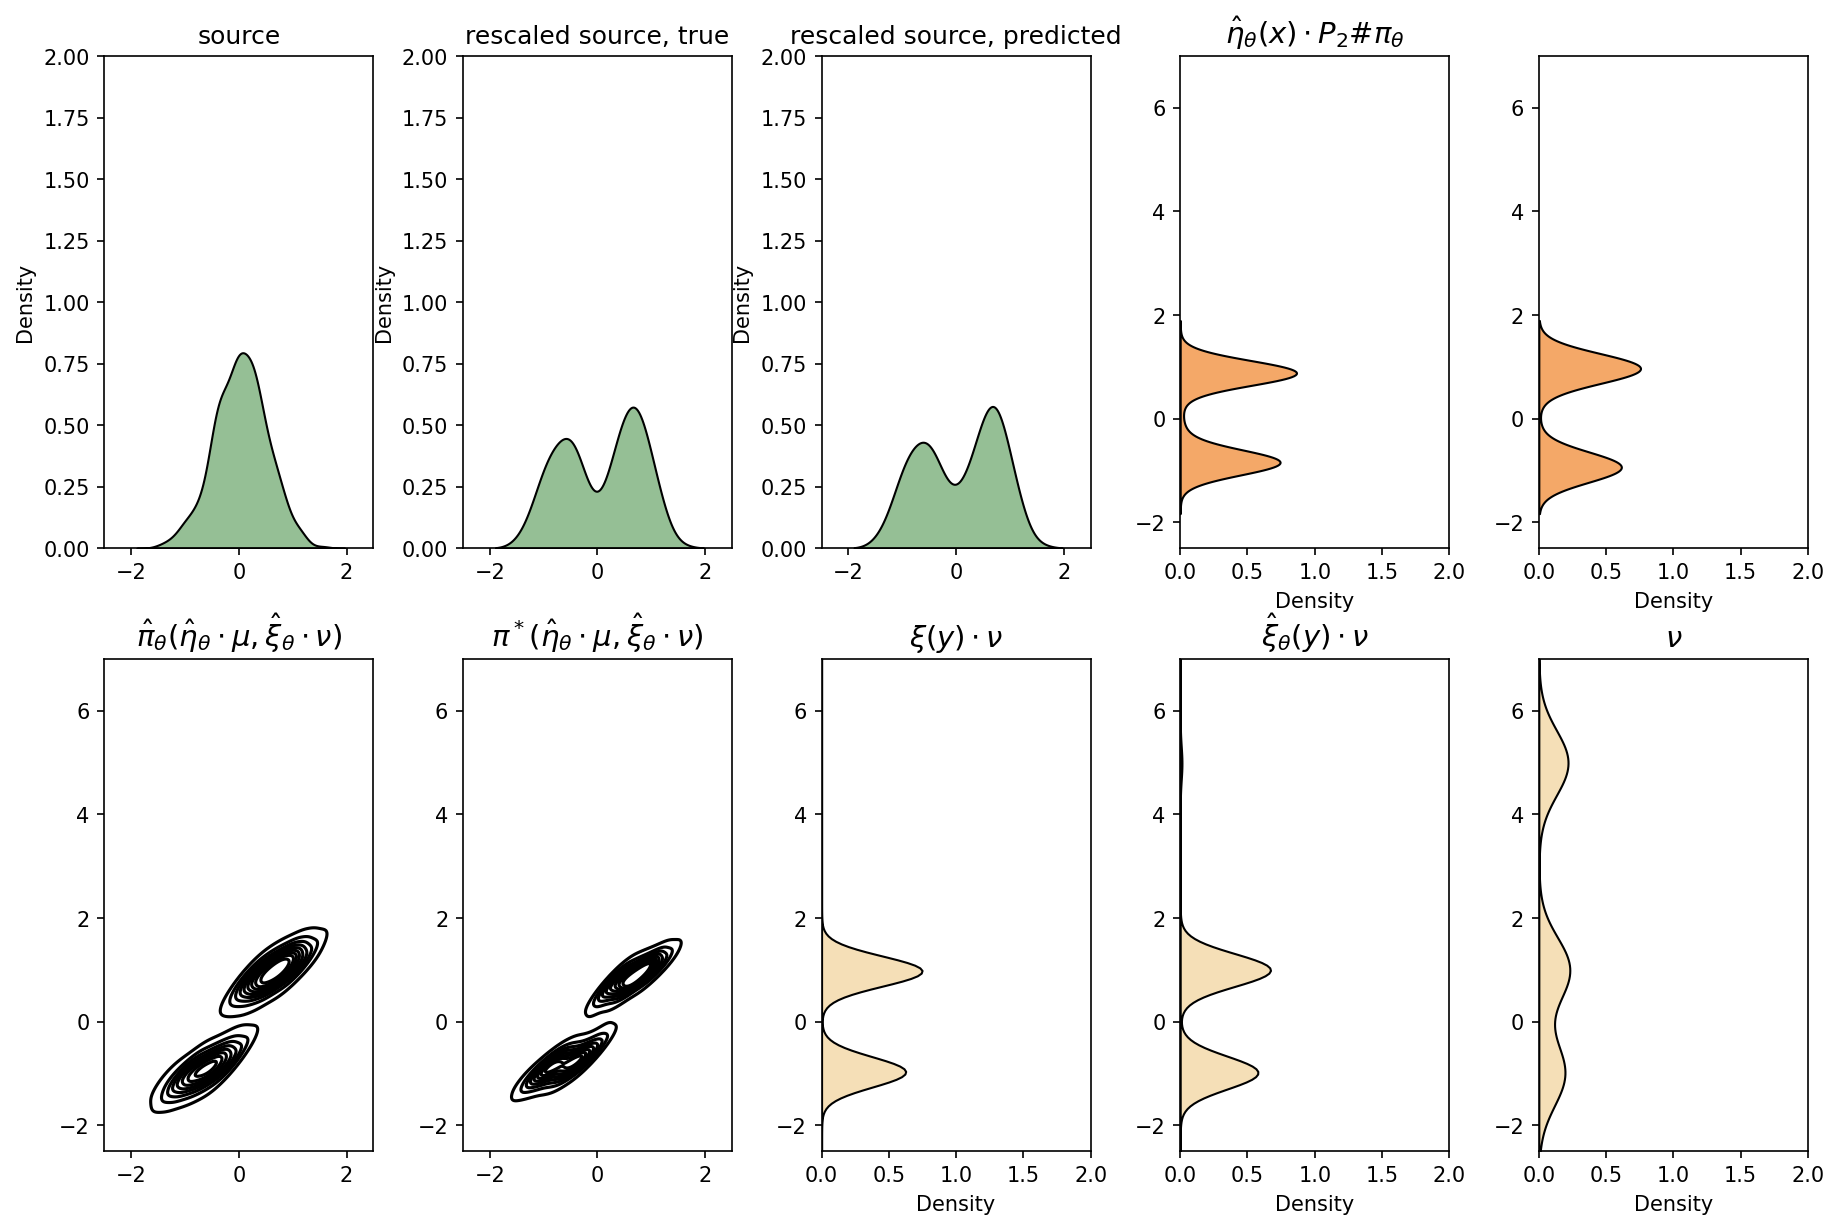

In [7]:
kwargs = {}
a = (-2.5, 2.5)
b = (0.0, 2.0)
c = (0.0, 4.0)
d = (-2.5, 7.0)
kwargs["00_xlim"] = a
kwargs["01_xlim"] = a
kwargs["02_xlim"] = a
kwargs["03_xlim"] = b
kwargs["04_xlim"] = b
kwargs["10_xlim"] = a
kwargs["11_xlim"] = a
kwargs["12_xlim"] = b
kwargs["13_xlim"] = b
kwargs["14_xlim"] = b

kwargs["00_ylim"] = b
kwargs["01_ylim"] = b
kwargs["02_ylim"] = b
kwargs["03_ylim"] = d
kwargs["04_ylim"] = d
kwargs["10_ylim"] = d
kwargs["11_ylim"] = d
kwargs["12_ylim"] = d
kwargs["13_ylim"] = d
kwargs["14_ylim"] = d

source.batch_size = 1024
source_batch = next(source)

target.batch_size = 1024
target_batch = next(target)

rescale_source = otfm.state_eta.apply_fn({"params": otfm.state_eta.params}, source_batch)
rescale_target = otfm.state_xi.apply_fn({"params": otfm.state_xi.params}, target_batch)

res, _, _ = otfm.transport(source_batch, seed=1, diffeqsolve_kwargs={"max_steps": 1_000_000})

_  = plot_1D_unbalanced(source_batch, target_batch, res[0,...], rescale_source, rescale_target, epsilon=epsilon, tau_a=tau_a, tau_b=tau_b, seed=1, figsize=(12, 8), dpi=150, **kwargs)